<h1><center>Assignment 2</center></h1>
<h1><center> Data Exploration and Preprocessing</center></h1>
<br><br><br><br>


## Names:
### 1. Amr Mohamed Fathy (46)
### 2. Abdelrhman Yasser (37)

## Exploring Dataset

We will begin our lab by exploring machine-learning-database :

- Total number of Instances = 2310 
  - Training data:  210 samples  
  - Testing data: 2100 samples

- Classes are  brickface, sky, foliage, cement, window, path, and grass.
  and distributed between the training data and testing data as following
  - 30 instances per class for training data.
  - 300 instances per class for test data.
- Now we will explore the attributes of the dataset:
  1. region-centroid-col:  the column of the center pixel of the region.
  2.  region-centroid-row:  the row of the center pixel of the region.
  3.  region-pixel-count:  the number of pixels in a region = 9.
  4.  short-line-density-5:  the results of a line extractoin algorithm that 
         counts how many lines of length 5 (any orientation) with
         low contrast, less than or equal to 5, go through the region.
  5.  short-line-density-2:  same as short-line-density-5 but counts lines
         of high contrast, greater than 5.
  6.  vedge-mean:  measure the contrast of horizontally
         adjacent pixels in the region.  There are 6, the mean and 
         standard deviation are given.  This attribute is used as
        a vertical edge detector.
  7.  vegde-sd:  explained as part in point 6.
  8.  hedge-mean:  measures the contrast of vertically adjacent pixels. Used for horizontal line detection. 
  9.  hedge-sd: explained as part in point 8.
  10. intensity-mean:  the average over the region of (R + G + B)/3
  11. rawred-mean: the average over the region of the R value.
  12. rawblue-mean: the average over the region of the B value.
  13. rawgreen-mean: the average over the region of the G value.
  14. exred-mean: measure the excess red:  (2R - (G + B))
  15. exblue-mean: measure the excess blue:  (2B - (G + R))
  16. exgreen-mean: measure the excess green:  (2G - (R + B))
  17. value-mean:  3-d nonlinear transformation
         of RGB. (Algorithm can be found in Foley and VanDam, Fundamentals
         of Interactive Computer Graphics)
  18. saturatoin-mean:  (see 17)
  19. hue-mean:  (see 17)

## Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset 

In [0]:
def parse_data(url):
  df = pd.read_csv(url, skiprows=2, index_col=False)
  column_names = ['label'] + list(df.columns.astype('str'))
  df = pd.read_csv(url, skiprows=4, index_col=False, names=column_names)
  return df

In [160]:
# Loading training dataset
training_df = parse_data(url='https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.data')
print("Training dataset contains {} samples".format(training_df.shape[0]))
training_df.head()

Training dataset contains 210 samples


,label,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [161]:
# Loading testing dataset
testing_df = parse_data(url='https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.test')
print("Testing dataset contains {} samples".format(testing_df.shape[0]))
testing_df.head()

Testing dataset contains 2100 samples


,label,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [162]:
# Merge datasets
total_df = pd.concat([training_df, testing_df])
total_df.sort_values('label')
print("Total dataset contains {} samples".format(total_df.shape[0]))
total_df.head()

Total dataset contains 2310 samples


,label,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


## Dataset Summary

In [163]:
total_df.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,2310.000000,2310.000000,2310.0,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2.310000e+03,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
mean,124.913853,123.417316,9.0,0.014334,0.004714,1.893939,5.709320,2.424723,8.243692e+00,37.051595,32.821308,44.187879,34.145599,-12.690861,21.408850,-8.717989,45.137470,0.426893,-1.362897
std,72.956532,57.483851,0.0,0.040154,0.024234,2.698908,44.846457,3.610084,5.881152e+01,38.176410,35.036774,43.527461,36.364773,11.583562,19.571819,11.551628,42.921764,0.228309,1.545335
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.589457e-08,0.000000,0.000000,0.000000,0.000000,-49.666668,-12.444445,-33.888890,0.000000,0.000000,-3.044175
25%,62.000000,81.000000,9.0,0.000000,0.000000,0.722222,0.355555,0.777780,4.216373e-01,7.296296,7.000000,9.555555,6.027778,-18.555555,4.138889,-16.777779,11.555555,0.284235,-2.188057
50%,121.000000,122.000000,9.0,0.000000,0.000000,1.222224,0.833333,1.444444,9.629633e-01,21.592592,19.555555,27.666667,20.333334,-10.888889,19.666666,-10.888889,28.666666,0.374803,-2.051200
75%,189.000000,172.000000,9.0,0.000000,0.000000,2.166667,1.806367,2.555556,2.183269e+00,53.212964,47.333332,64.888890,46.500001,-4.222222,35.777780,-3.222222,64.888890,0.540123,-1.562308
max,254.000000,251.000000,9.0,0.333333,0.222222,29.222221,991.718400,44.722225,1.386329e+03,143.444440,137.111110,150.888890,142.555560,9.888889,82.000000,24.666666,150.888890,1.000000,2.912480


## Splitting Dataset into values and class labels

In [164]:
X = total_df.iloc[:,1:]
Y = total_df['label']
classes = np.unique(Y)
print('classes : {}'.format(classes))
print(X.shape)
display(X)
display(Y)

classes : ['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']
(2310, 19)


,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,140.0,125.0,9,0.000000,0.000000,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,188.0,133.0,9,0.000000,0.000000,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,105.0,139.0,9,0.000000,0.000000,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,34.0,137.0,9,0.000000,0.000000,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,39.0,111.0,9,0.000000,0.000000,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
5,16.0,128.0,9,0.000000,0.000000,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
6,26.0,67.0,9,0.111111,0.000000,1.000000,0.888890,2.444445,3.185185,20.000000,19.555555,25.888890,14.555555,-1.333333,17.666666,-16.333334,25.888890,0.436939,-1.623202
7,14.0,110.0,9,0.000000,0.000000,1.722222,5.351850,2.666667,1.022223,17.925926,18.888890,21.444445,13.444445,2.888889,10.555555,-13.444445,21.444445,0.368848,-1.345096
8,11.0,108.0,9,0.000000,0.000000,1.333333,0.800000,1.388889,0.951852,17.666666,19.000000,21.111110,12.888889,4.000000,10.333333,-14.333333,21.111110,0.388756,-1.302133
9,85.0,101.0,9,0.000000,0.000000,1.333333,1.288888,1.277778,1.218518,21.296297,21.222221,26.777779,15.888889,-0.222222,16.444445,-16.222221,26.777779,0.404792,-1.558599


0       BRICKFACE
1       BRICKFACE
2       BRICKFACE
3       BRICKFACE
4       BRICKFACE
5       BRICKFACE
6       BRICKFACE
7       BRICKFACE
8       BRICKFACE
9       BRICKFACE
10      BRICKFACE
11      BRICKFACE
12      BRICKFACE
13      BRICKFACE
14      BRICKFACE
15      BRICKFACE
16      BRICKFACE
17      BRICKFACE
18      BRICKFACE
19      BRICKFACE
20      BRICKFACE
21      BRICKFACE
22      BRICKFACE
23      BRICKFACE
24      BRICKFACE
25      BRICKFACE
26      BRICKFACE
27      BRICKFACE
28      BRICKFACE
29      BRICKFACE
          ...    
2070         PATH
2071         PATH
2072       WINDOW
2073       WINDOW
2074       WINDOW
2075       WINDOW
2076       WINDOW
2077       WINDOW
2078       WINDOW
2079       WINDOW
2080       WINDOW
2081       WINDOW
2082       WINDOW
2083       WINDOW
2084       WINDOW
2085       WINDOW
2086       WINDOW
2087       WINDOW
2088       WINDOW
2089       WINDOW
2090       WINDOW
2091       WINDOW
2092       WINDOW
2093       CEMENT
2094      

## Plotting the dataset

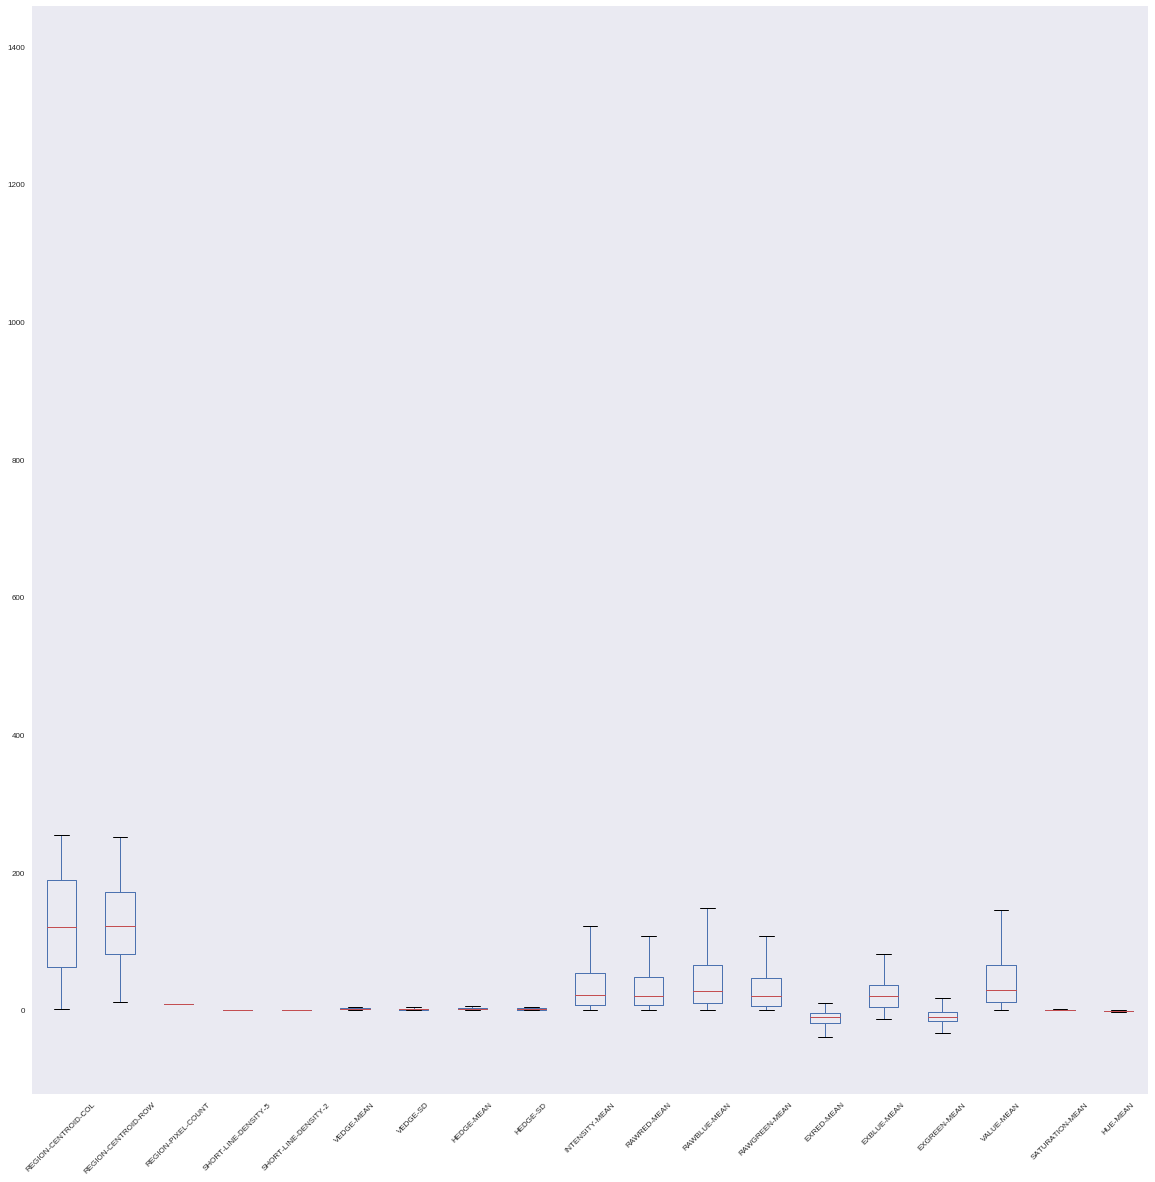

In [165]:
total_df.iloc[:,1:].boxplot(grid=False, fontsize=8, rot=45, figsize=(20,20))

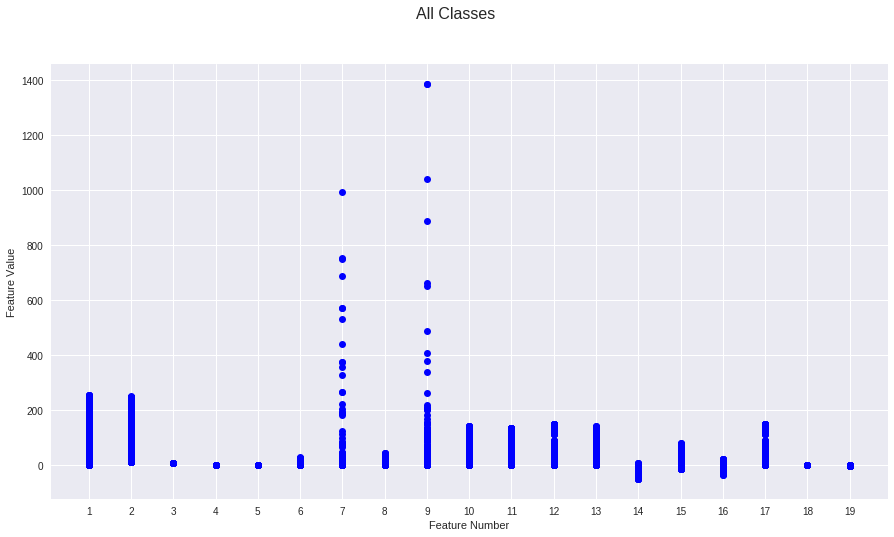

In [166]:
def plot_data(x_data, y_data, x_title, y_title, title, xticks):
  fig = plt.figure(figsize=(15,8))
  plt.plot(x_data, y_data, 'bo')
  fig.suptitle(title, fontsize=16)
  plt.xlabel(x_title)
  plt.ylabel(y_title)
  plt.xticks(xticks)
  plt.show()
  return

classes_values = classes
feature_names = list(total_df.columns)
all_x = []
all_y = []
# plotting each class alone
for class_val in classes_values:
  # making feature points
  x = []
  y = []
  for i in range(1, len(feature_names)):
    feature_values = list(total_df[total_df['label'] == class_val].iloc[:, i])
    y = y + feature_values
    x = x + [i] * len(feature_values)
  all_x = all_x + x
  all_y = all_y + y
# plotting all classes together
plot_data(all_x, all_y, 'Feature Number', 'Feature Value', 'All Classes', [i for i in range(1, len(feature_names))])

##Pearson Correlation

Now we will calculate Pearson correlation  

\begin{equation}
   Mean =\frac{1}{N} \sum X[i] 
\end{equation}

\begin{equation}
    Variance = \frac{1}{N} \sum_{1}^{N} X[i]^{2} - \overline{X}^{2}
\end{equation}

\begin{equation}
    Covariance = E(A.B) - \overline{A} . \overline{B}
\end{equation}

\begin{equation}
      r(A,B) = \frac{Cov(A,B)}{\sigma A \ \sigma B}
\end{equation}





In [167]:
pearson_coeff_matrix = X.corr(method='pearson')
display(pearson_coeff_matrix)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
REGION-CENTROID-COL,1.000000,0.026768,NaN,-0.051962,-0.015964,-0.011304,0.021960,-0.018914,-0.001939,0.058957,0.054673,0.058169,0.063381,-0.086816,0.043098,0.014035,0.060189,-0.108214,0.039299
REGION-CENTROID-ROW,0.026768,1.000000,NaN,0.064891,0.041869,0.026146,-0.053578,0.105223,-0.021077,-0.465240,-0.468009,-0.481521,-0.437971,0.353175,-0.490219,0.476421,-0.458388,0.081556,0.592930
REGION-PIXEL-COUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHORT-LINE-DENSITY-5,-0.051962,0.064891,NaN,1.000000,-0.009024,-0.020206,-0.032781,-0.021286,-0.037996,-0.018211,-0.016755,-0.021392,-0.015604,0.028013,-0.036164,0.033182,-0.015886,-0.043221,0.112989
SHORT-LINE-DENSITY-2,-0.015964,0.041869,NaN,-0.009024,1.000000,0.262575,0.193728,0.303182,0.243155,-0.006911,-0.012471,0.003078,-0.013435,-0.044829,0.060979,-0.058362,-0.000145,0.016208,-0.082939
VEDGE-MEAN,-0.011304,0.026146,NaN,-0.020206,0.262575,1.000000,0.637452,0.559491,0.488347,0.005129,-0.005482,0.020498,-0.003099,-0.100457,0.106744,-0.080120,0.018148,-0.064827,-0.097959
VEDGE-SD,0.021960,-0.053578,NaN,-0.032781,0.193728,0.637452,1.000000,0.471016,0.703049,0.003006,-0.002138,0.006782,0.003410,-0.049123,0.027659,0.002396,0.004804,0.002306,-0.061591
HEDGE-MEAN,-0.018914,0.105223,NaN,-0.021286,0.303182,0.559491,0.471016,1.000000,0.668179,0.033973,0.026059,0.043846,0.029406,-0.099434,0.093738,-0.059111,0.042232,-0.125955,-0.093803
HEDGE-SD,-0.001939,-0.021077,NaN,-0.037996,0.243155,0.488347,0.703049,0.668179,1.000000,0.013518,0.008538,0.016899,0.014121,-0.056186,0.033647,-0.000666,0.014858,-0.024149,-0.069988
INTENSITY-MEAN,0.058957,-0.465240,NaN,-0.018211,-0.006911,0.005129,0.003006,0.033973,0.013518,1.000000,0.998112,0.995809,0.995842,-0.830261,0.792257,-0.509756,0.997385,-0.608290,-0.329845


**Notice that pearson coeff between REGION-PIXEL-COUNT feature with all the others features is NaN as all REGION-PIXEL-COUNT values are the same which is equal to 9 . So the variance of REGION-PIXEL-COUNT feature is 0. So when we calculate the pearson using the following formula :**
\begin{equation}
      r(A,B) = \frac{Cov(A,B)}{\sigma A \ \sigma B}
\end{equation}

**we will get \begin{equation} r(A,B) = \frac{Cov(A,B)}{zero} \end{equation} which will result NaN value**


In [0]:
def visualize_coeff_matrix(mat, norm=False):
  fig = plt.figure(figsize = (12,12))
  if norm==False:
    plt.imshow(mat, cmap='Reds')
  else:
    plt.imshow(mat, cmap='Reds', vmin=0, vmax=1)
  plt.colorbar()
  plt.xticks([i for i in range(0,mat.shape[0])])
  plt.yticks([i for i in range(0,mat.shape[0])])

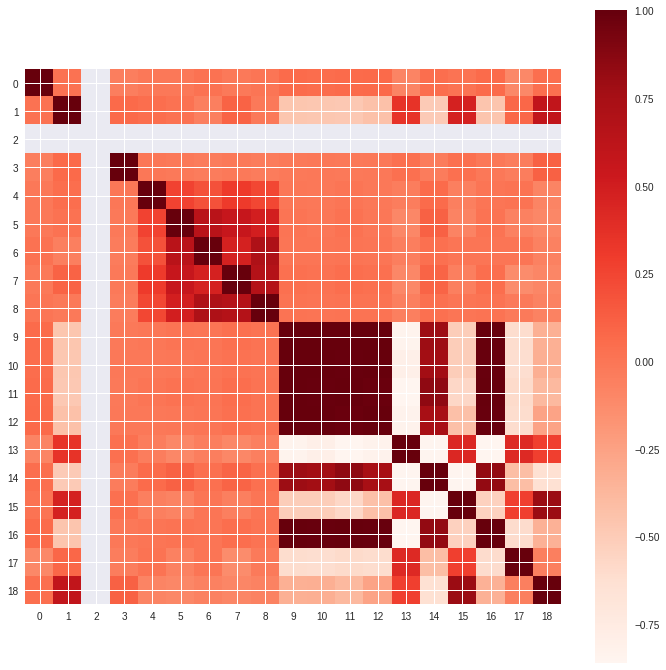

In [169]:
visualize_coeff_matrix(pearson_coeff_matrix)

## Convariance Calculating

Now we will compute covariance matrix

In [170]:
covariance_coeff_matrix = total_df.cov()
display(covariance_coeff_matrix)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
REGION-CENTROID-COL,5322.655633,112.261605,0.0,-0.152222,-0.028226,-2.225830,71.850789,-4.981611,-8.318737,164.209187,139.753091,184.722513,168.151958,-73.368285,61.539978,11.828309,188.478189,-1.802488,4.430609
REGION-CENTROID-ROW,112.261605,3304.393117,0.0,0.149783,0.058327,4.056431,-138.121244,21.835935,-71.256512,-1020.982645,-942.593272,-1204.825006,-915.529680,235.168129,-551.527028,316.358899,-1130.983933,1.070354,52.671047
REGION-PIXEL-COUNT,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SHORT-LINE-DENSITY-5,-0.152222,0.149783,0.0,0.001612,-0.000009,-0.002190,-0.059032,-0.003086,-0.089729,-0.027916,-0.023573,-0.037389,-0.022785,0.013029,-0.028421,0.015391,-0.027379,-0.000396,0.007011
SHORT-LINE-DENSITY-2,-0.028226,0.058327,0.0,-0.000009,0.000587,0.017174,0.210548,0.026525,0.346558,-0.006394,-0.010589,0.003247,-0.011840,-0.012584,0.028923,-0.016338,-0.000151,0.000090,-0.003106
VEDGE-MEAN,-2.225830,4.056431,0.0,-0.002190,0.017174,7.284104,77.154914,5.451284,77.513850,0.528485,-0.518380,2.407979,-0.304143,-3.140597,5.638482,-2.497886,2.102268,-0.039945,-0.408560
VEDGE-SD,71.850789,-138.121244,0.0,-0.059032,0.210548,77.154914,2011.204665,76.257247,1854.284580,5.147211,-3.359009,13.239618,5.561028,-25.518664,24.277221,1.241442,9.247399,0.023612,-4.268463
HEDGE-MEAN,-4.981611,21.835935,0.0,-0.003086,0.026525,5.451284,76.257247,13.032705,141.864126,4.682097,3.296073,6.889813,3.860406,-4.158073,6.623148,-2.465074,6.543955,-0.103814,-0.523308
HEDGE-SD,-8.318737,-71.256512,0.0,-0.089729,0.346558,77.513850,1854.284580,141.864126,3458.794558,30.350893,17.592150,43.260490,30.200059,-38.276254,38.728788,-0.452533,37.505597,-0.324256,-6.360770
INTENSITY-MEAN,164.209187,-1020.982645,0.0,-0.027916,-0.006394,0.528485,5.147211,4.682097,30.350893,1457.438265,1335.052524,1654.758170,1382.504132,-367.157227,591.959640,-224.802412,1634.314320,-5.301873,-19.459342


Before Scaling Covariance Matrix


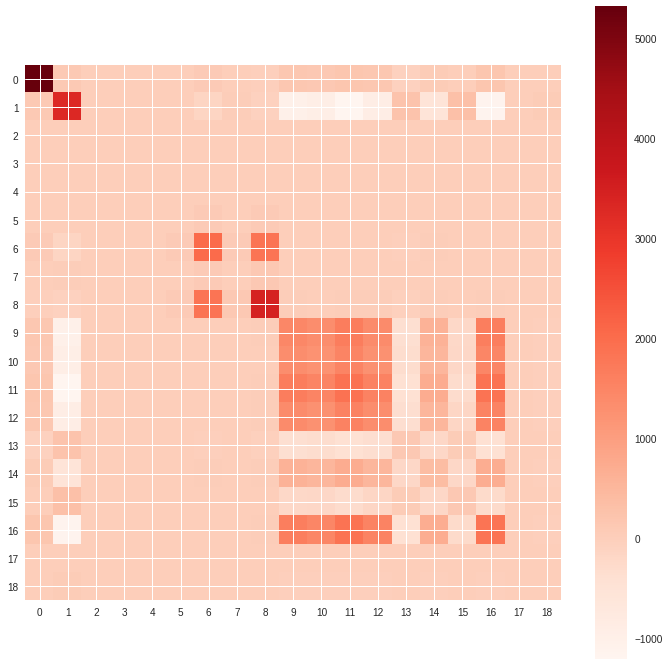

In [171]:
print('Before Scaling Covariance Matrix')
visualize_coeff_matrix(covariance_coeff_matrix)

After Scaling Covariance Matrix


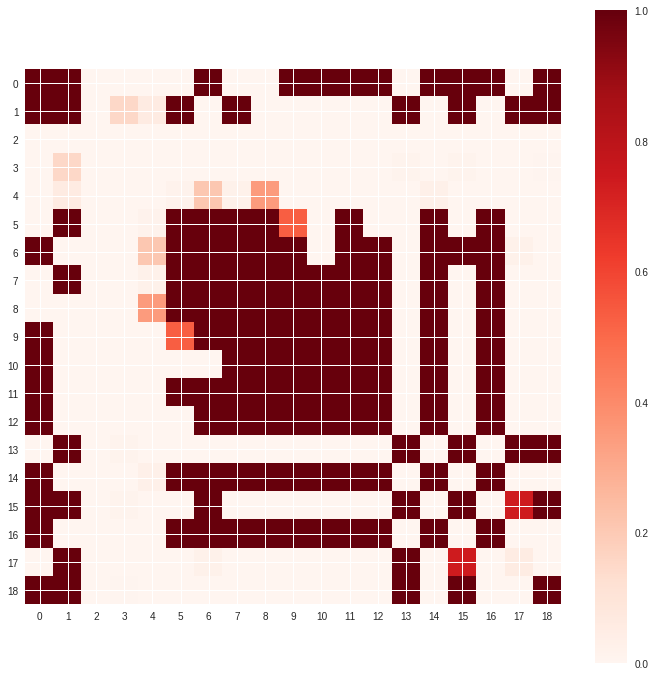

In [172]:
print('After Scaling Covariance Matrix')
visualize_coeff_matrix(covariance_coeff_matrix, norm=True)

The relation between the covariance matrix of the dataset and the Pearson’s correlation matrix can be described as following:
\begin{equation}
      r(A,B) = \frac{Cov(A,B)}{\sigma A \ \sigma B}
\end{equation}


## Plotting Histograms

Plot the data histogram for each class separately . Let each class have only one plot with a different color for each attribute.

In [0]:
def plot_histogram(bins, rwidth):
  colors = ['red', 'green', 'blue', 'olive', 'yellow', 'gray', 'black', 'gold', 'skyblue',
            'teal', 'cyan', 'tomato', 'pink', 'violet', 'plum', 'navy', 'c', 'm', 'y' ]
  for class_val in classes:
    data = total_df[total_df['label'] == class_val].iloc[:,1:]
    plt.figure(figsize=(20,10))
    plt.title("class " + class_val )
    plt.xlabel("Feature Value")
    plt.ylabel("Value Frequency")
    plt.hist(np.array(data), bins=bins, color=np.array(colors), label=classes_names, rwidth=rwidth)
    plt.legend()
    plt.show()

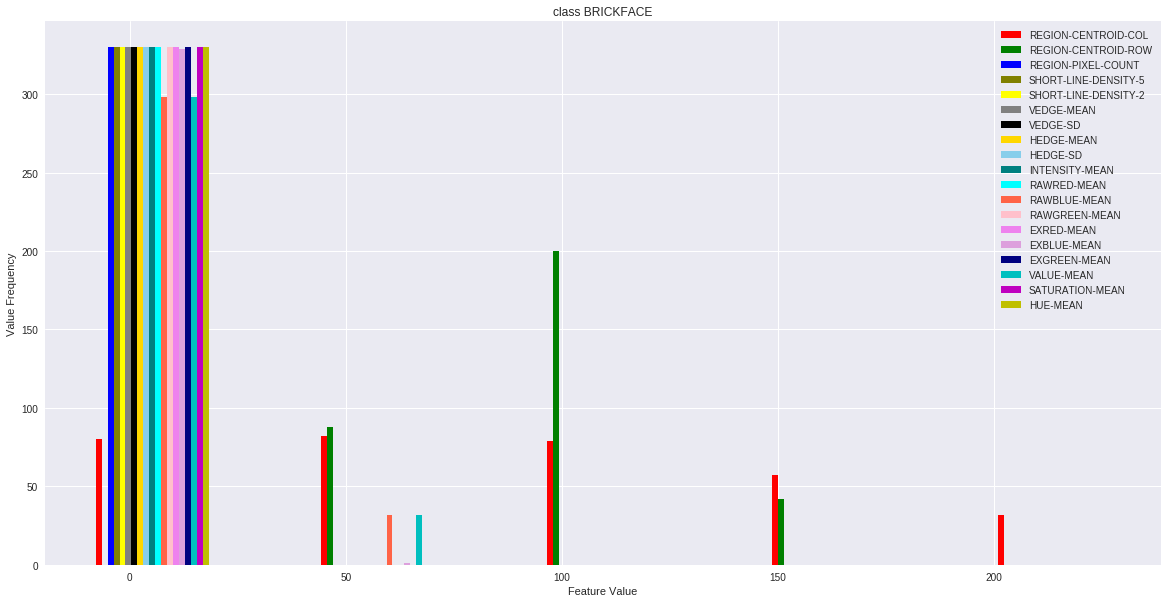

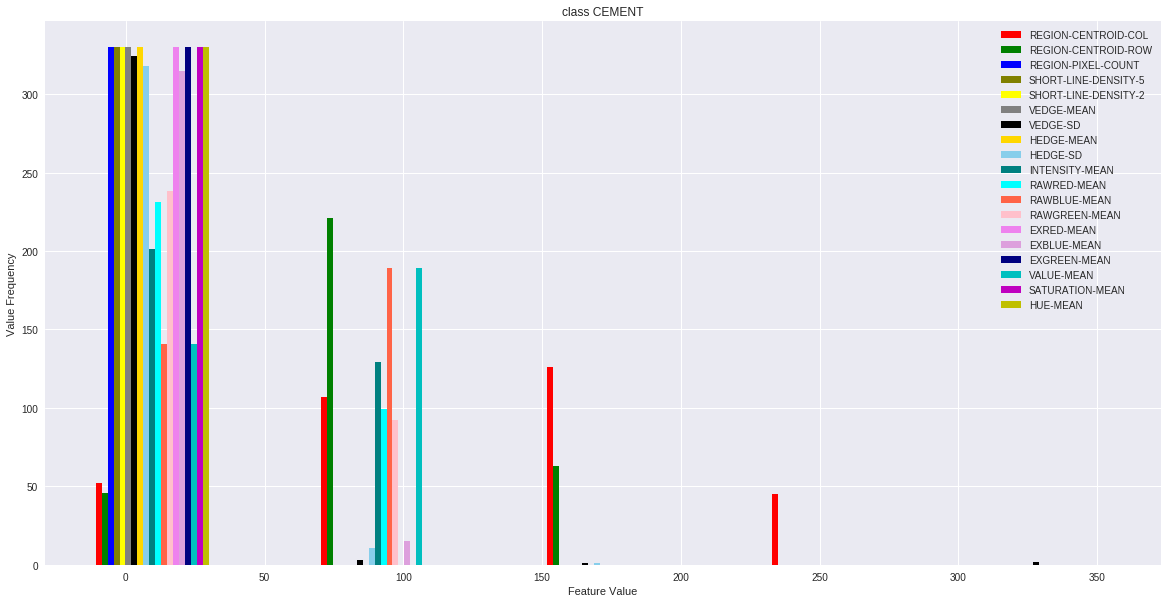

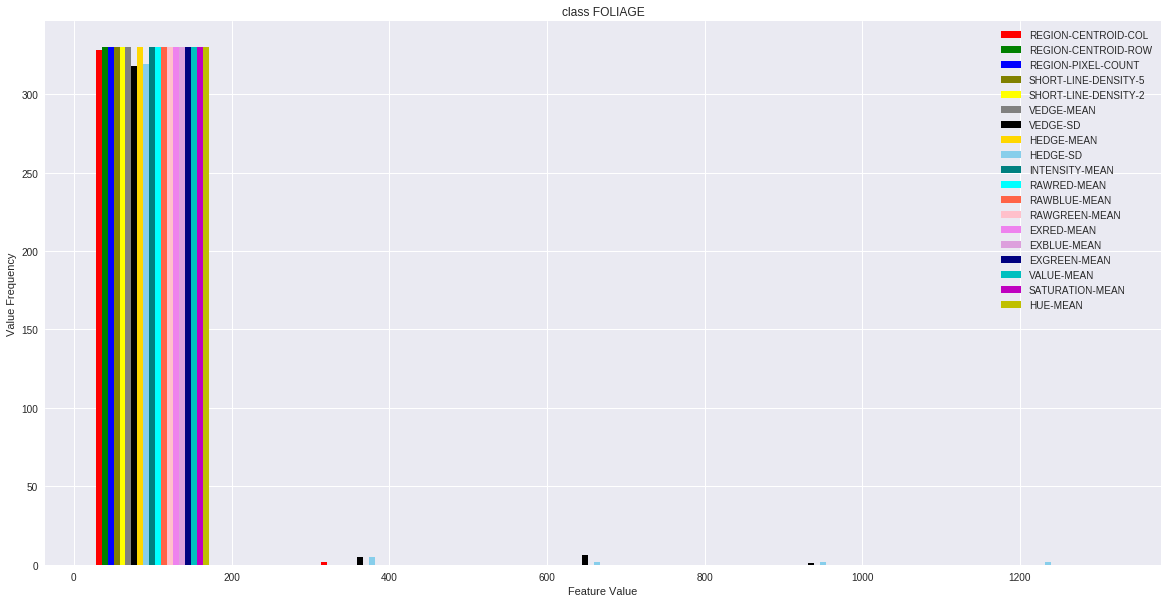

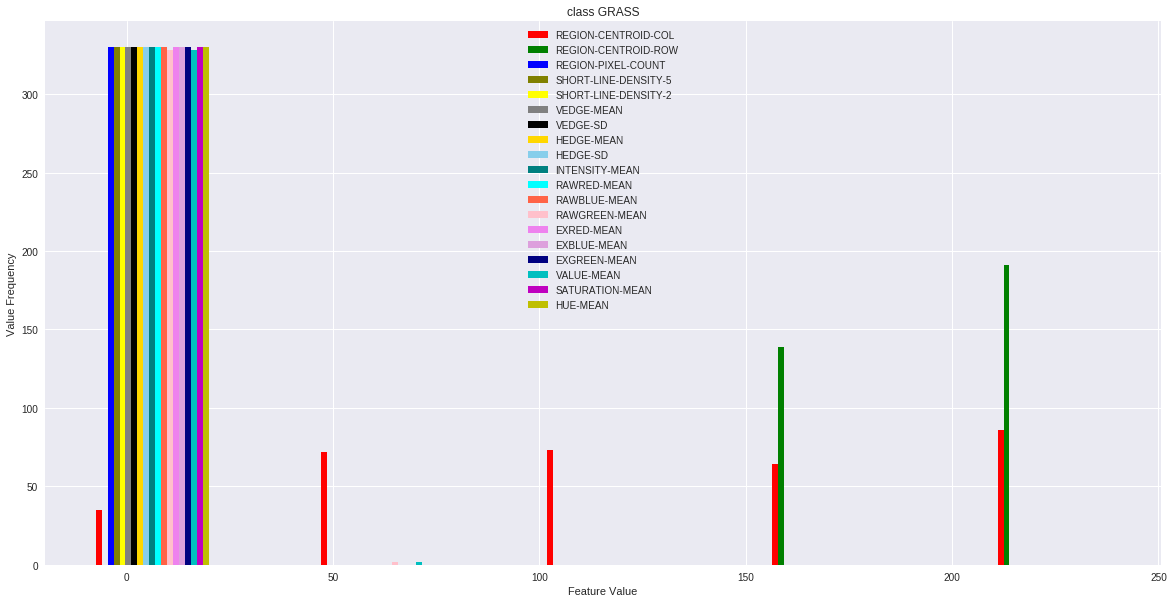

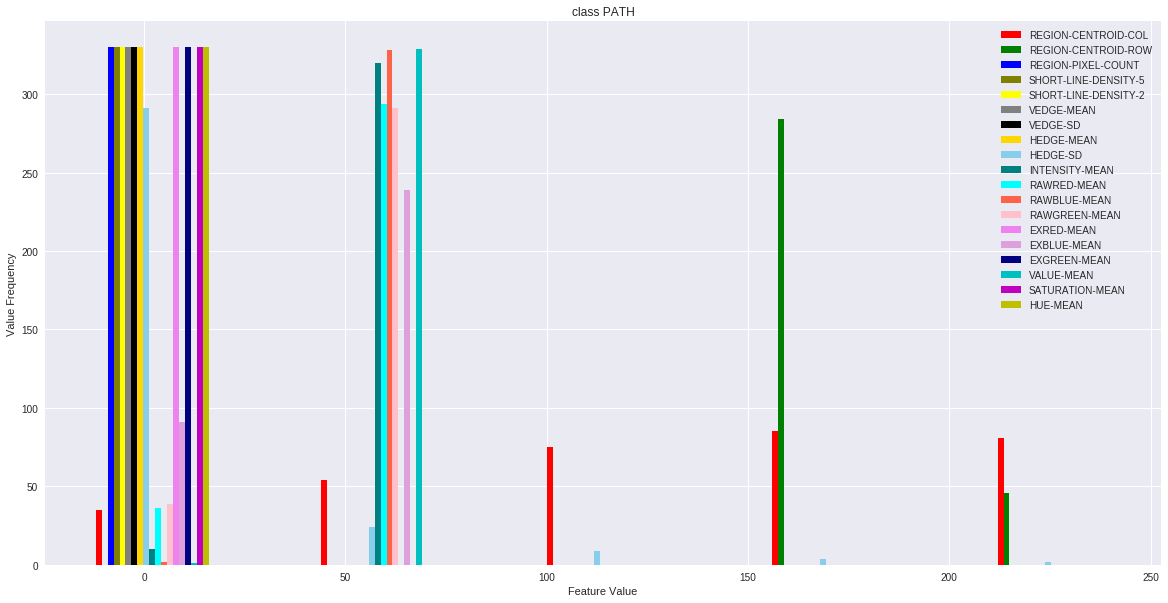

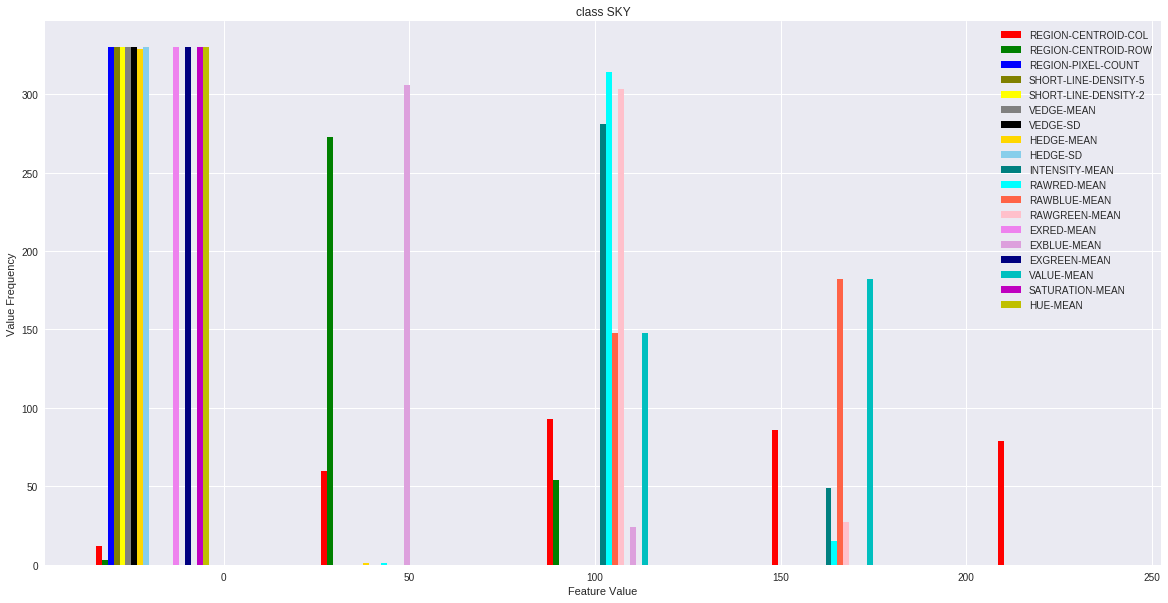

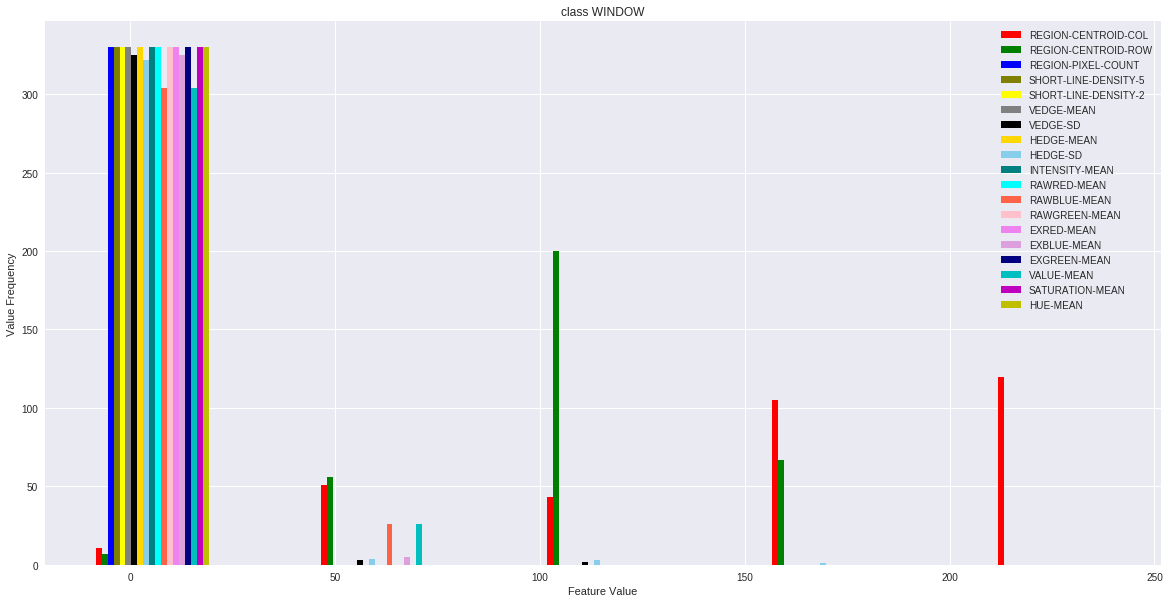

In [174]:
# 5 bins
plot_histogram(5, 0.5)

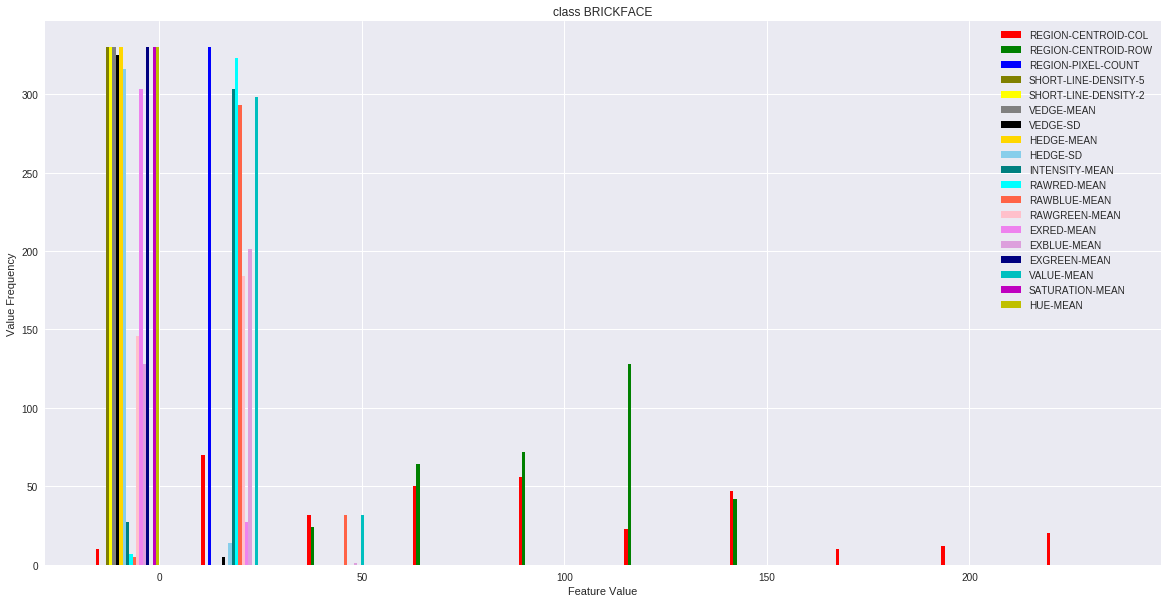

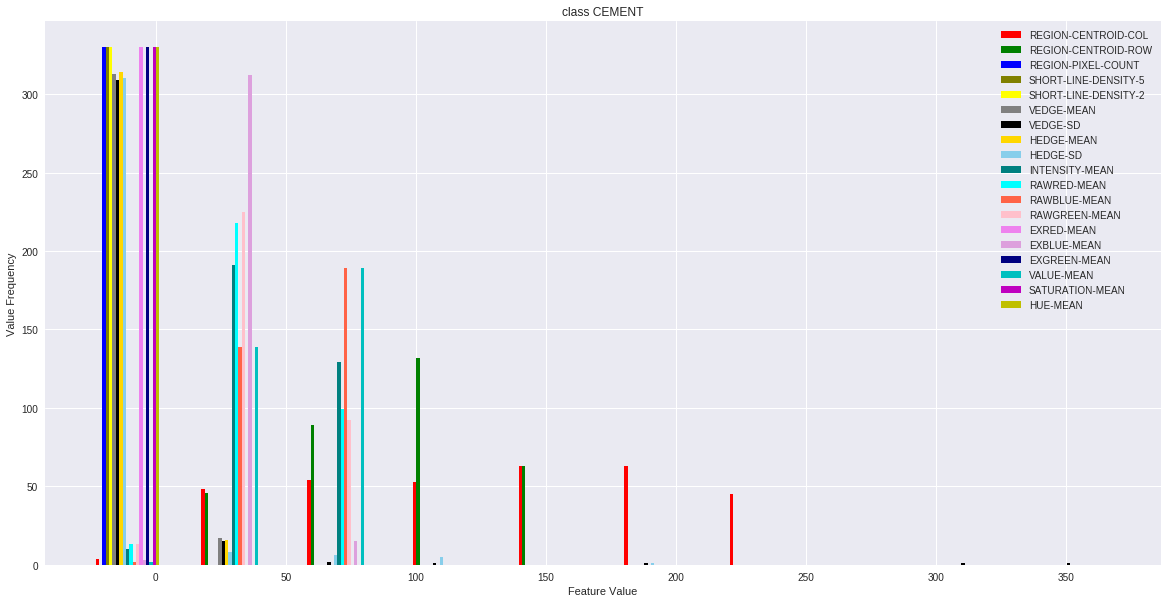

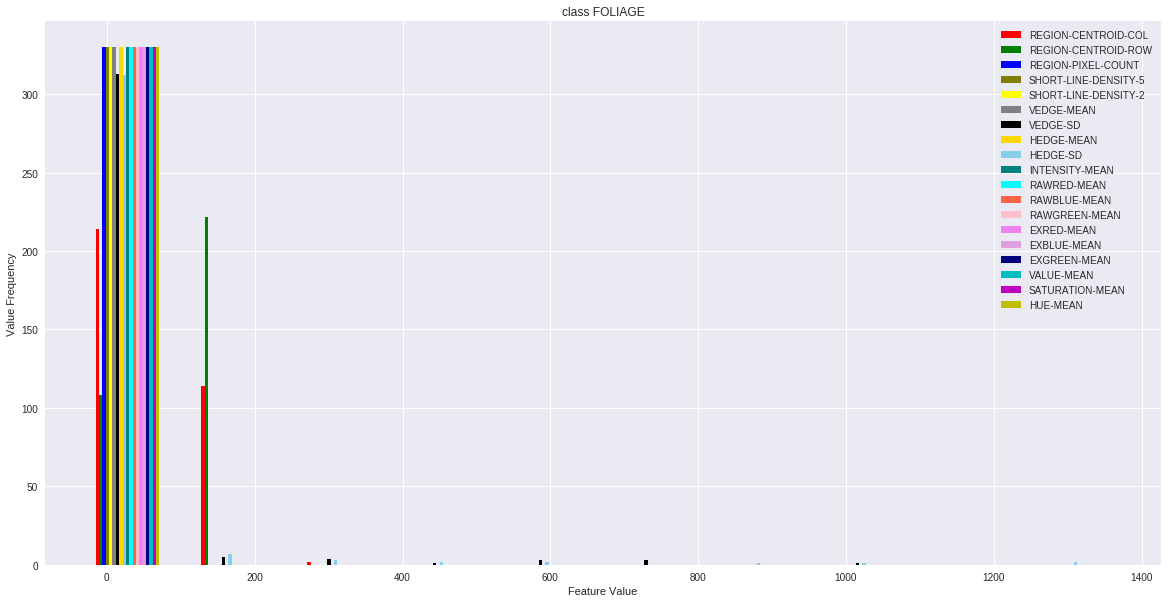

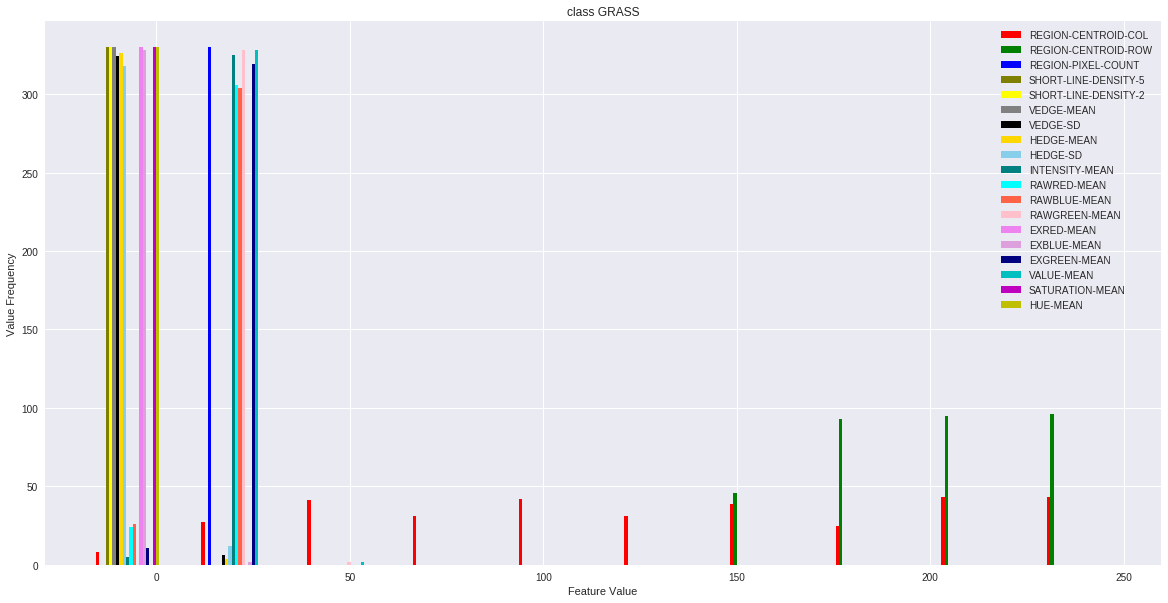

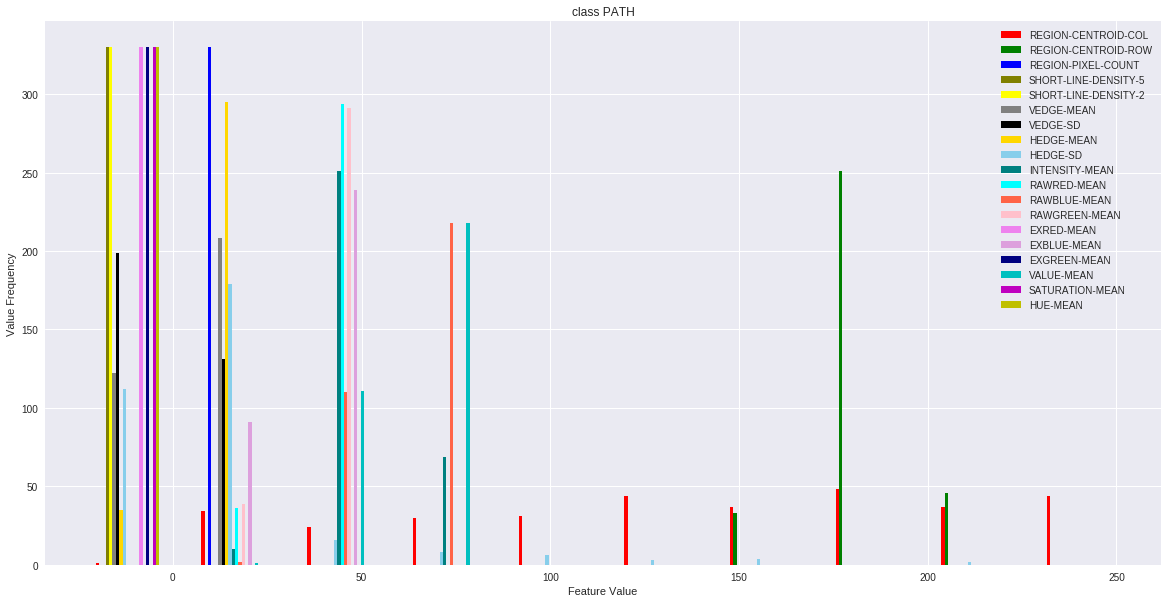

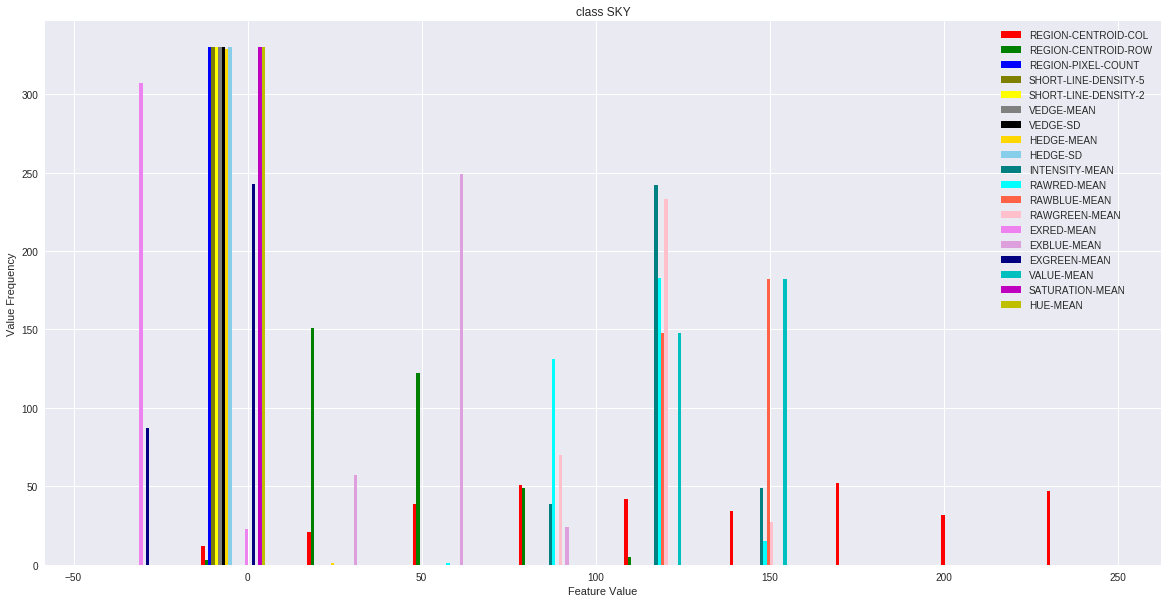

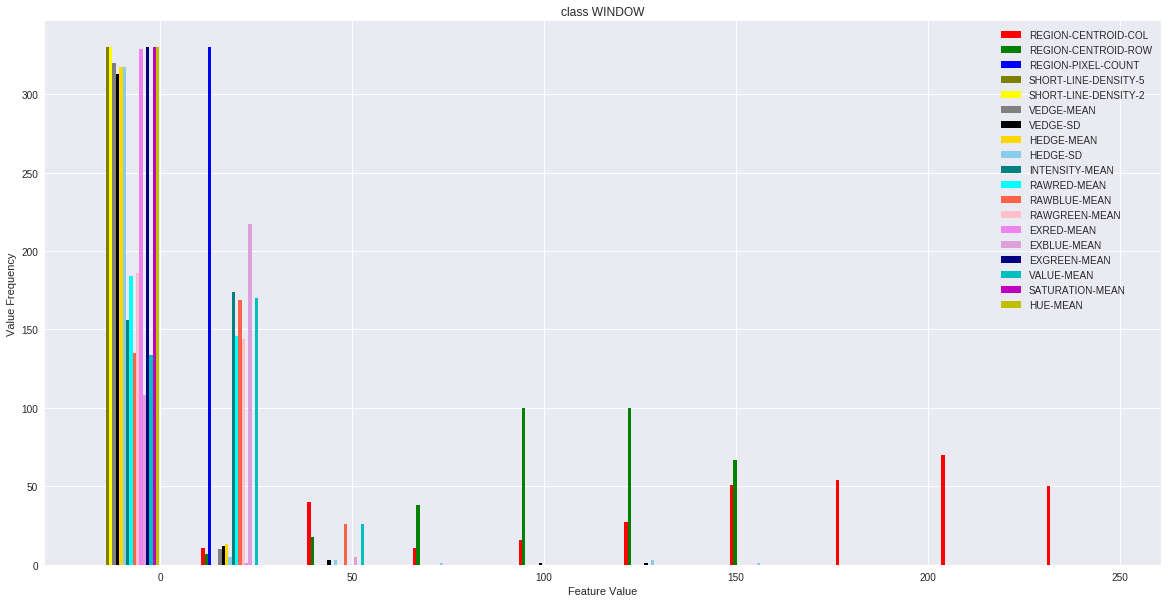

In [175]:
# 10 bins
plot_histogram(10, 0.6)

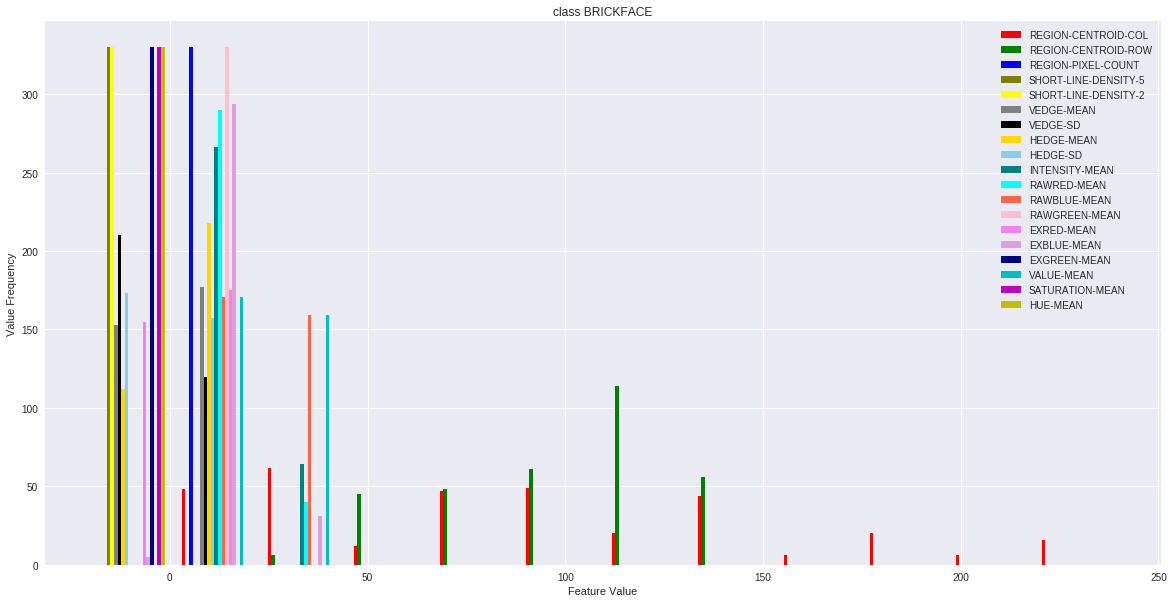

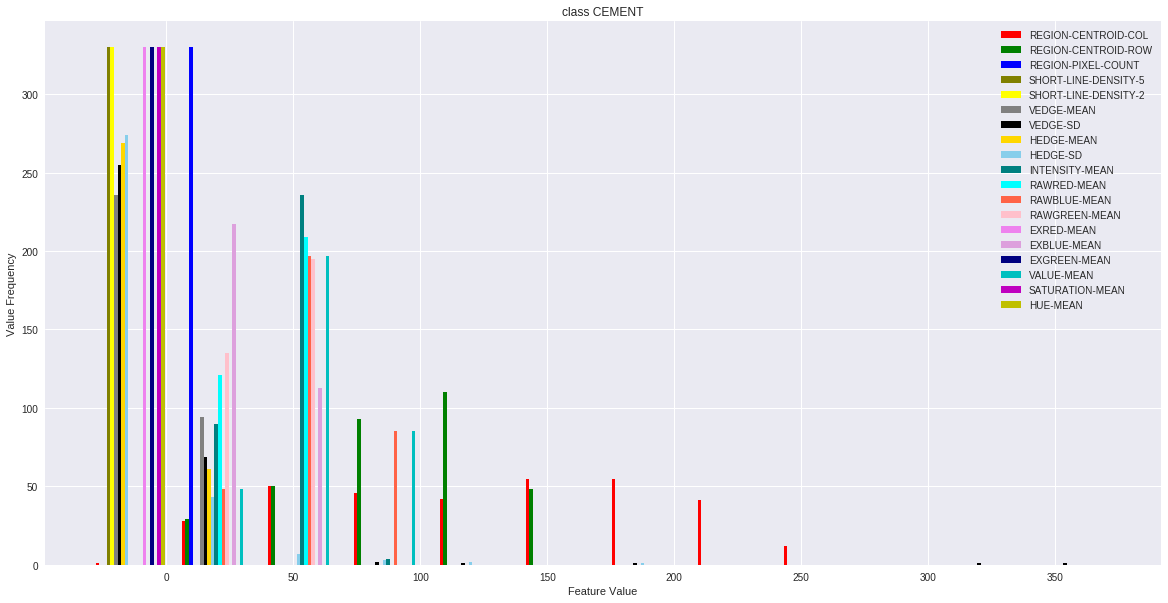

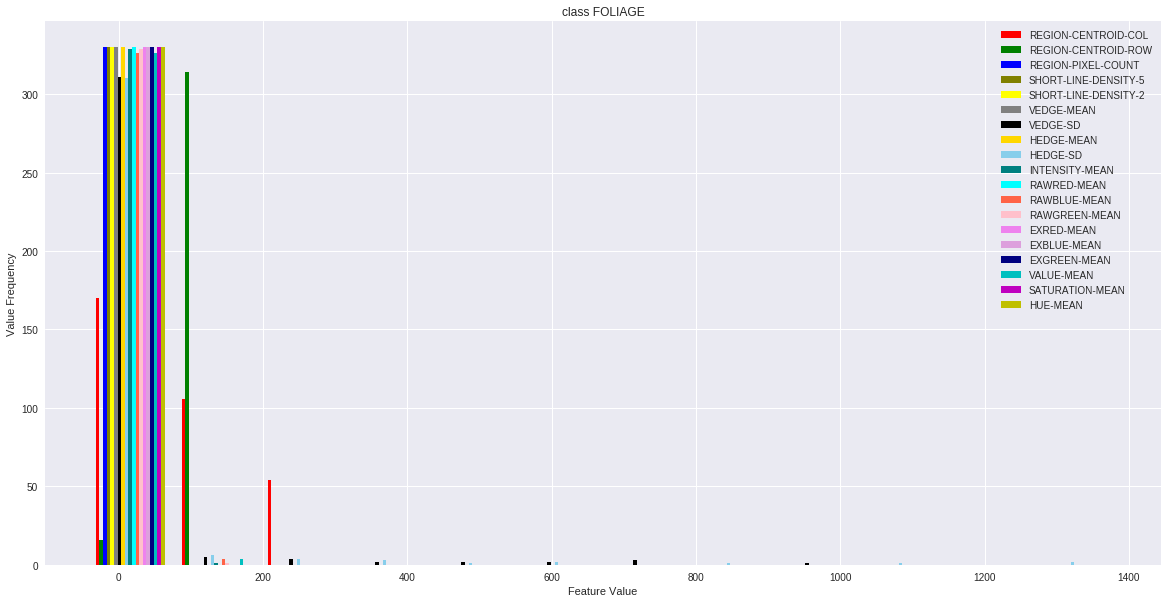

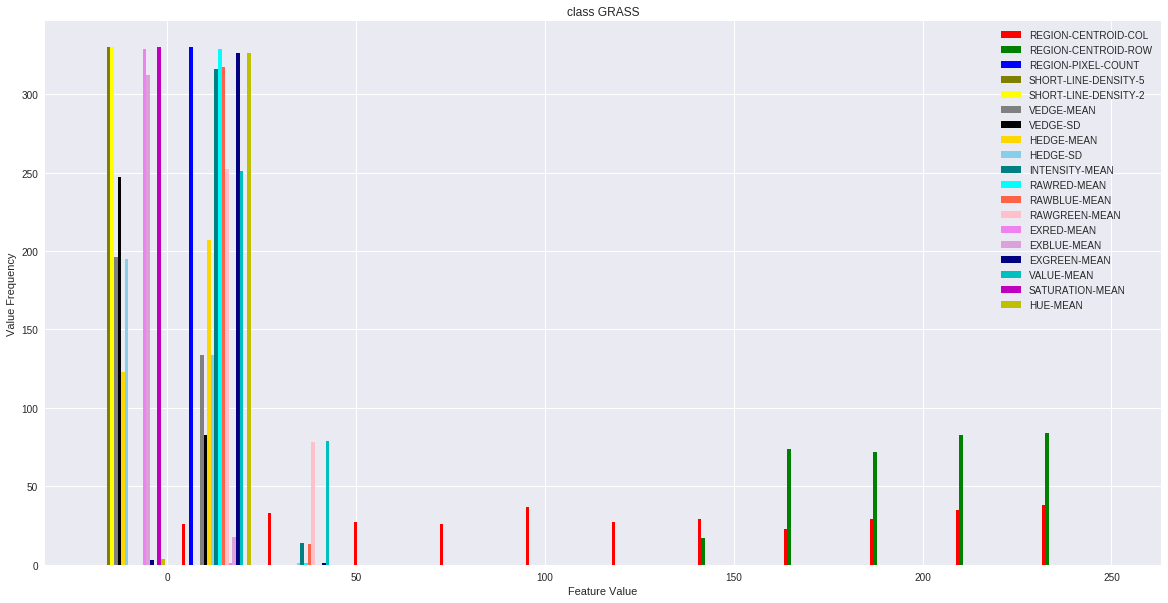

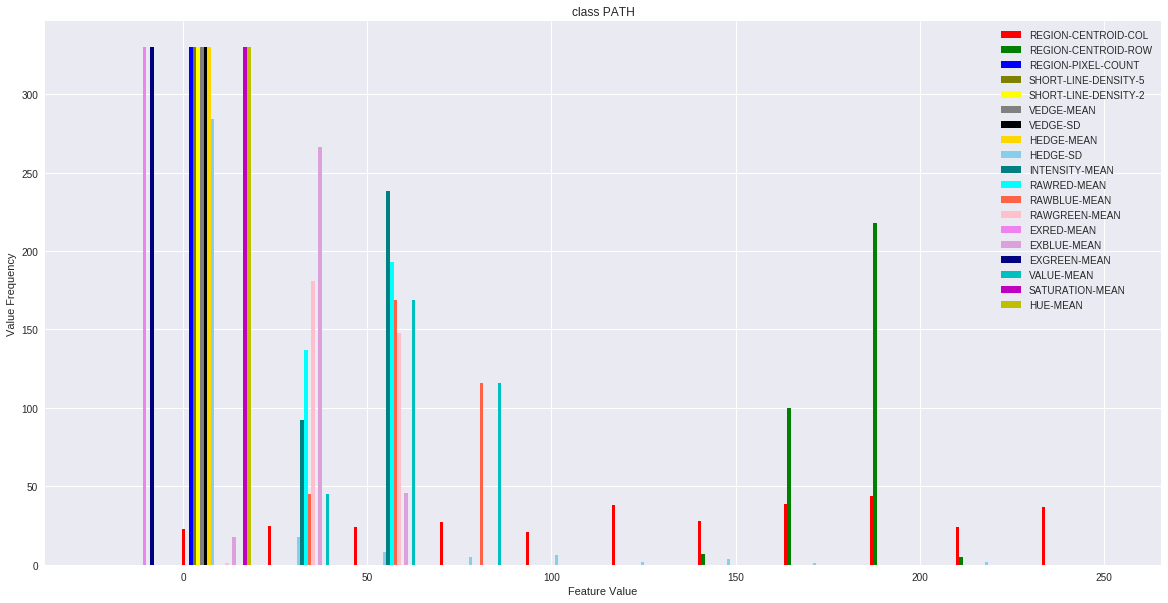

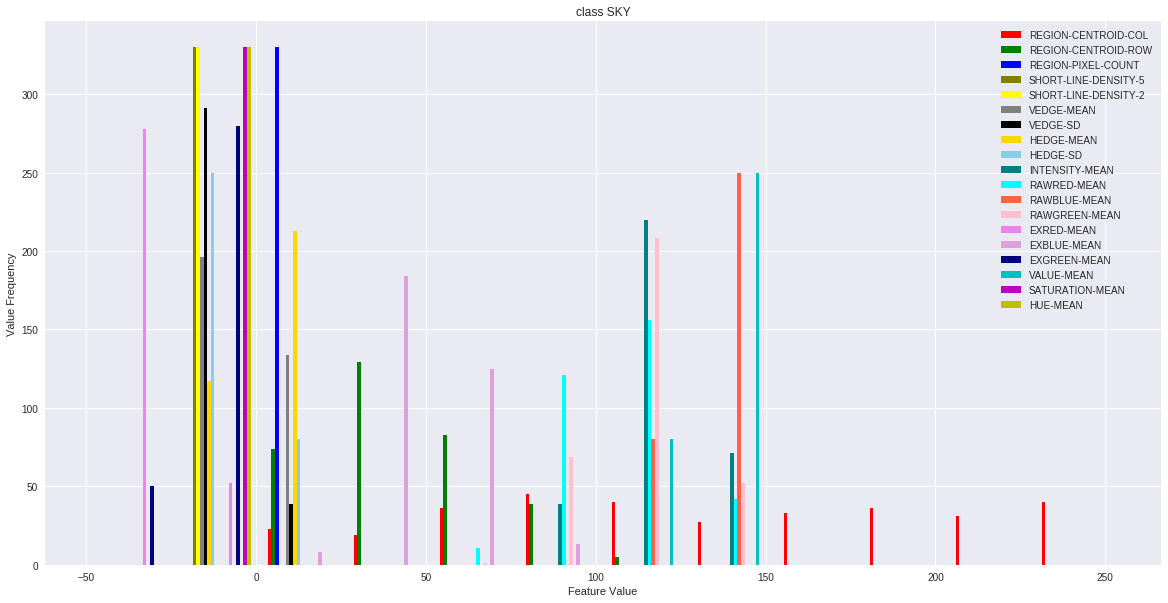

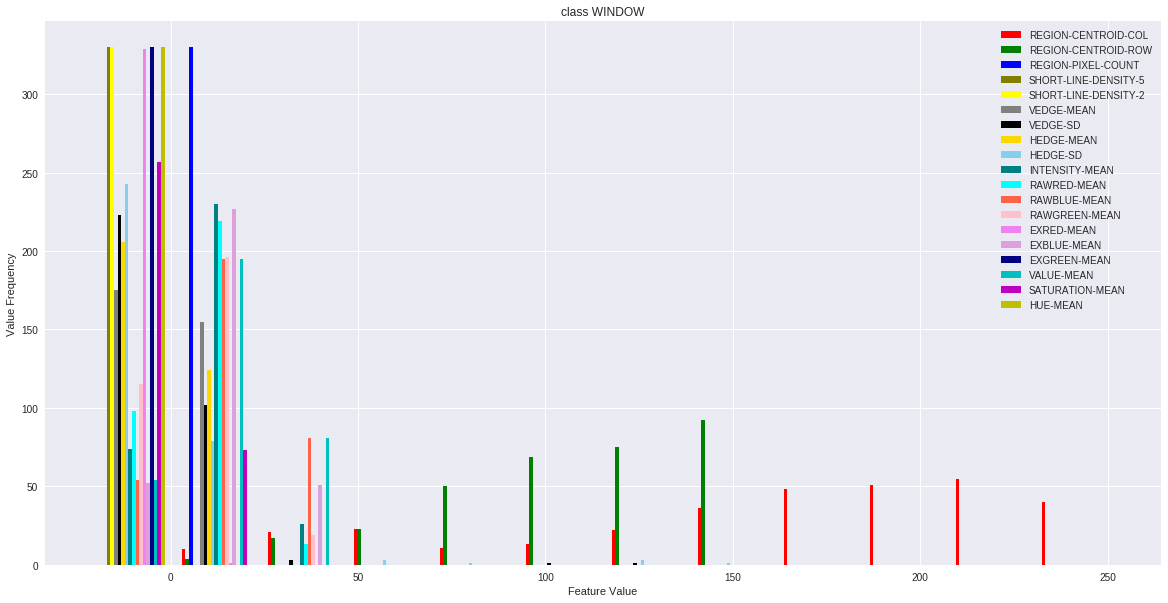

In [176]:
# 12 bins
plot_histogram(12, 0.8)

## Normalization

### 1) Min Max Scaler

In [177]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
total_df_normalized_min_max = pd.DataFrame(data=scaler.fit_transform(total_df.iloc[:,1:]), columns=total_df.columns[1:])
display(total_df_normalized_min_max)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0.549407,0.475000,0.0,0.000000,0.0,0.009506,0.000063,0.014907,0.000224,0.043119,0.053485,0.050810,0.024942,0.891791,0.178824,0.444023,0.051546,0.545635,0.322724
1,0.739130,0.508333,0.0,0.000000,0.0,0.011407,0.000269,0.011180,0.000056,0.046476,0.060778,0.051546,0.027280,0.917910,0.167059,0.436433,0.055965,0.538580,0.355797
2,0.411067,0.533333,0.0,0.000000,0.0,0.009506,0.000108,0.018634,0.000377,0.042603,0.055105,0.047865,0.024942,0.906716,0.167059,0.447818,0.050074,0.532628,0.348892
3,0.130435,0.525000,0.0,0.000000,0.0,0.017110,0.000168,0.024845,0.000342,0.040795,0.056726,0.042710,0.023383,0.930970,0.150588,0.449715,0.051546,0.573633,0.386107
4,0.150198,0.416667,0.0,0.000000,0.0,0.024715,0.000377,0.019876,0.000310,0.042086,0.051053,0.050810,0.024162,0.882463,0.183529,0.445920,0.052283,0.562919,0.313666
5,0.059289,0.487500,0.0,0.000000,0.0,0.017110,0.000078,0.014907,0.000224,0.038730,0.050243,0.044183,0.021824,0.901119,0.167059,0.453510,0.047128,0.561508,0.345557
6,0.098814,0.233333,0.0,0.333333,0.0,0.034221,0.000896,0.054658,0.002298,0.139427,0.142626,0.171576,0.102104,0.811567,0.318824,0.299810,0.171576,0.436939,0.238552
7,0.051383,0.412500,0.0,0.000000,0.0,0.058935,0.005397,0.059627,0.000737,0.124968,0.137763,0.142121,0.094310,0.882463,0.243529,0.349146,0.142121,0.368848,0.285241
8,0.039526,0.404167,0.0,0.000000,0.0,0.045627,0.000807,0.031056,0.000687,0.123160,0.138574,0.139912,0.090413,0.901119,0.241176,0.333966,0.139912,0.388756,0.292453
9,0.332016,0.375000,0.0,0.000000,0.0,0.045627,0.001300,0.028571,0.000879,0.148464,0.154781,0.177467,0.111458,0.830224,0.305882,0.301708,0.177467,0.404792,0.249398


Visualizing data after normalization by Min Max Scaler



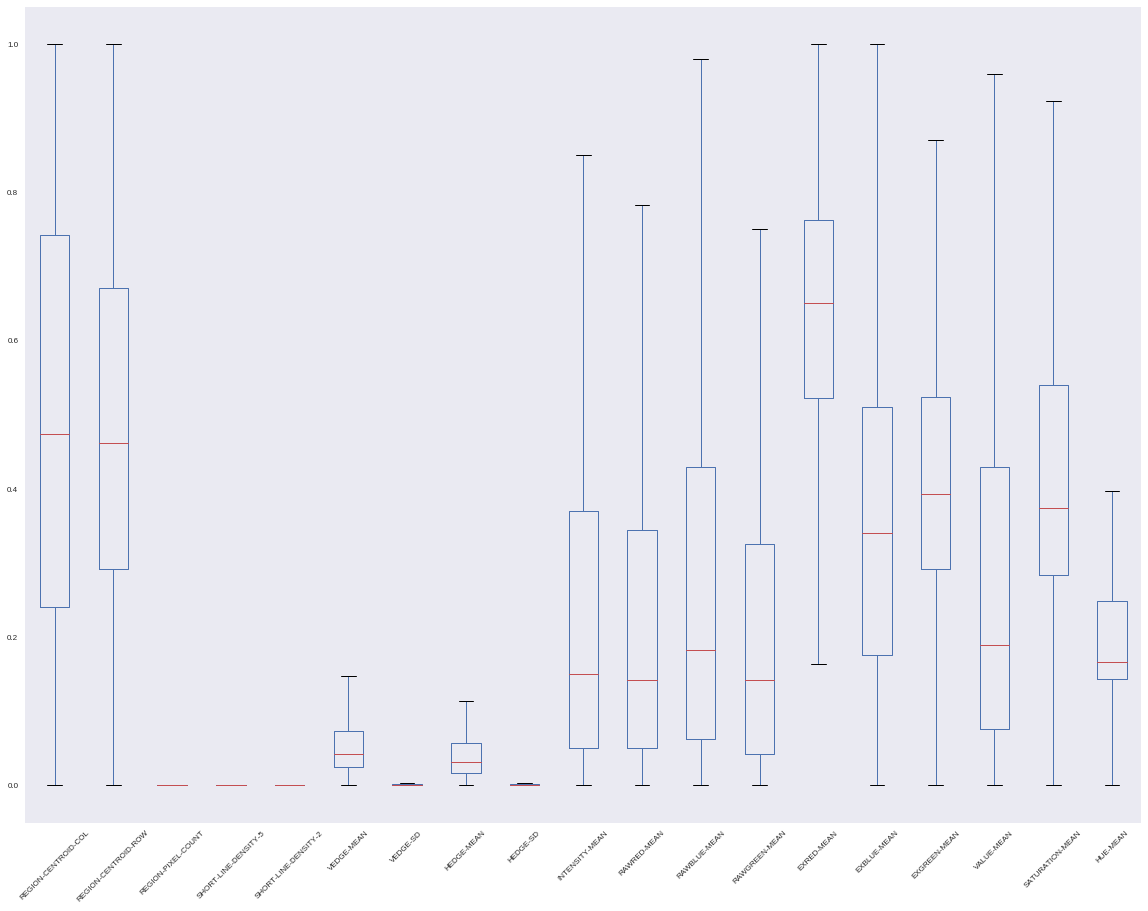

In [178]:
fig = plt.figure(figsize = (20,15))
boxplot = total_df_normalized_min_max.boxplot(grid=False, fontsize=8, rot=45)

**Comment** : After Min Max Normalization we could see that data is not skewed much. So all attribute now have nearly the same range and we can extract patters/insights from the data easily. Moreover, we can see the correlation between the attributes.

### 2) Z Score Normalization

Finding Z Score Normalization for all attributes



In [179]:
from scipy.stats import zscore
total_df_normalized_zscore1 = total_df.iloc[:,1:].apply(zscore)
display(total_df_normalized_zscore1)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0.206827,0.027539,NaN,-0.357047,-0.194552,-0.598950,-0.125931,-0.487090,-0.134911,-0.808696,-0.727621,-0.839220,-0.841382,1.393250,-0.866965,0.071789,-0.870602,0.520205,0.156038
1,0.864896,0.166738,NaN,-0.357047,-0.194552,-0.578361,-0.121388,-0.533267,-0.138879,-0.796081,-0.699073,-0.836667,-0.832214,1.527569,-0.923748,0.033306,-0.855067,0.489298,0.283547
2,-0.273014,0.271138,NaN,-0.357047,-0.194552,-0.598950,-0.124940,-0.440914,-0.131320,-0.810636,-0.721277,-0.849433,-0.841382,1.470004,-0.923748,0.091031,-0.875781,0.463221,0.256926
3,-1.246407,0.236338,NaN,-0.357047,-0.194552,-0.516594,-0.123619,-0.363952,-0.132139,-0.817429,-0.714933,-0.867306,-0.847494,1.594729,-1.003245,0.100651,-0.870602,0.642864,0.400405
4,-1.177858,-0.216061,NaN,-0.357047,-0.194552,-0.434239,-0.118993,-0.425521,-0.132895,-0.812577,-0.737137,-0.839220,-0.844438,1.345279,-0.844252,0.081410,-0.868013,0.595925,0.121116
5,-1.493183,0.079739,NaN,-0.357047,-0.194552,-0.516595,-0.125601,-0.487090,-0.134911,-0.825192,-0.740309,-0.862199,-0.853607,1.441221,-0.923748,0.119893,-0.886138,0.589744,0.244069
6,-1.356085,-0.981659,NaN,2.410668,-0.194552,-0.331294,-0.107511,0.005464,-0.086031,-0.446749,-0.378706,-0.420492,-0.538826,0.980699,-0.191244,-0.659387,-0.448554,0.044012,-0.168482
7,-1.520602,-0.233461,NaN,-0.357047,-0.194552,-0.063638,-0.007973,0.067033,-0.122817,-0.501090,-0.397737,-0.522621,-0.569387,1.345279,-0.554657,-0.409248,-0.552124,-0.254292,0.011522
8,-1.561732,-0.268261,NaN,-0.357047,-0.194552,-0.207761,-0.109493,-0.286990,-0.124013,-0.507882,-0.394565,-0.530281,-0.584668,1.441221,-0.566014,-0.486214,-0.559892,-0.167075,0.039329
9,-0.547209,-0.390060,NaN,-0.357047,-0.194552,-0.207761,-0.098589,-0.317775,-0.119478,-0.412787,-0.331126,-0.400066,-0.502153,1.076641,-0.253706,-0.649766,-0.427840,-0.096823,-0.126668


Visualizing data after normalization by Z Score

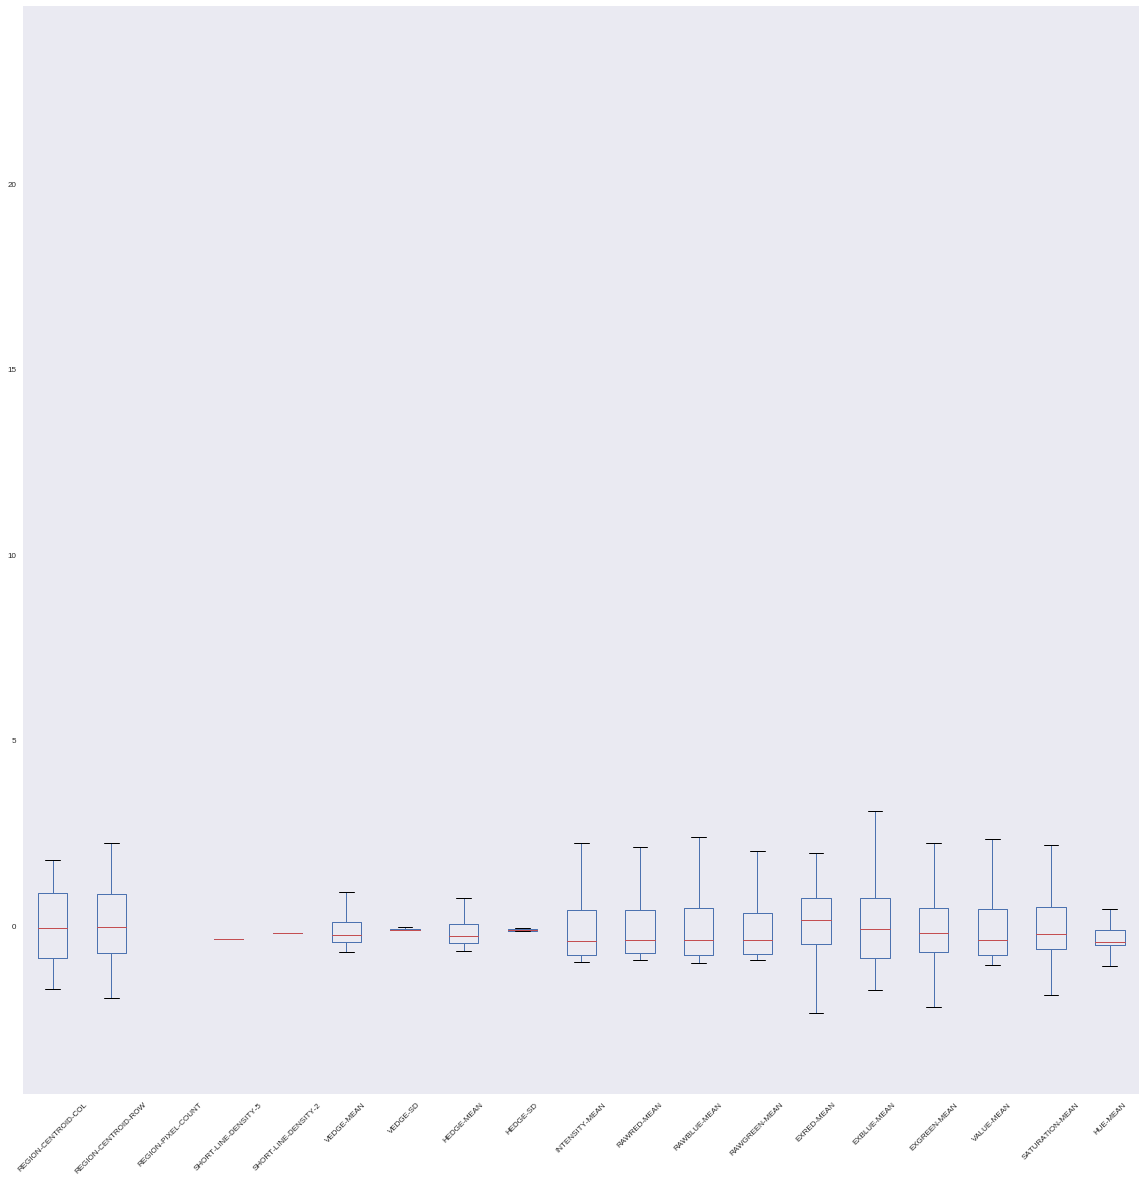

In [180]:
boxplot = total_df_normalized_zscore1.boxplot(grid=False, fontsize=8, rot=45, figsize=(20,20))

Finding Z Score Normalization for the non constant attributes to avoid NaN values after the normalization

In [181]:
total_df_normalized_zscore2 = total_df.iloc[:,1:].apply(lambda x: x if np.std(x) == 0 else zscore(x))
display(total_df_normalized_zscore2)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0.206827,0.027539,9,-0.357047,-0.194552,-0.598950,-0.125931,-0.487090,-0.134911,-0.808696,-0.727621,-0.839220,-0.841382,1.393250,-0.866965,0.071789,-0.870602,0.520205,0.156038
1,0.864896,0.166738,9,-0.357047,-0.194552,-0.578361,-0.121388,-0.533267,-0.138879,-0.796081,-0.699073,-0.836667,-0.832214,1.527569,-0.923748,0.033306,-0.855067,0.489298,0.283547
2,-0.273014,0.271138,9,-0.357047,-0.194552,-0.598950,-0.124940,-0.440914,-0.131320,-0.810636,-0.721277,-0.849433,-0.841382,1.470004,-0.923748,0.091031,-0.875781,0.463221,0.256926
3,-1.246407,0.236338,9,-0.357047,-0.194552,-0.516594,-0.123619,-0.363952,-0.132139,-0.817429,-0.714933,-0.867306,-0.847494,1.594729,-1.003245,0.100651,-0.870602,0.642864,0.400405
4,-1.177858,-0.216061,9,-0.357047,-0.194552,-0.434239,-0.118993,-0.425521,-0.132895,-0.812577,-0.737137,-0.839220,-0.844438,1.345279,-0.844252,0.081410,-0.868013,0.595925,0.121116
5,-1.493183,0.079739,9,-0.357047,-0.194552,-0.516595,-0.125601,-0.487090,-0.134911,-0.825192,-0.740309,-0.862199,-0.853607,1.441221,-0.923748,0.119893,-0.886138,0.589744,0.244069
6,-1.356085,-0.981659,9,2.410668,-0.194552,-0.331294,-0.107511,0.005464,-0.086031,-0.446749,-0.378706,-0.420492,-0.538826,0.980699,-0.191244,-0.659387,-0.448554,0.044012,-0.168482
7,-1.520602,-0.233461,9,-0.357047,-0.194552,-0.063638,-0.007973,0.067033,-0.122817,-0.501090,-0.397737,-0.522621,-0.569387,1.345279,-0.554657,-0.409248,-0.552124,-0.254292,0.011522
8,-1.561732,-0.268261,9,-0.357047,-0.194552,-0.207761,-0.109493,-0.286990,-0.124013,-0.507882,-0.394565,-0.530281,-0.584668,1.441221,-0.566014,-0.486214,-0.559892,-0.167075,0.039329
9,-0.547209,-0.390060,9,-0.357047,-0.194552,-0.207761,-0.098589,-0.317775,-0.119478,-0.412787,-0.331126,-0.400066,-0.502153,1.076641,-0.253706,-0.649766,-0.427840,-0.096823,-0.126668


Visualizing data after normalization by Z Score

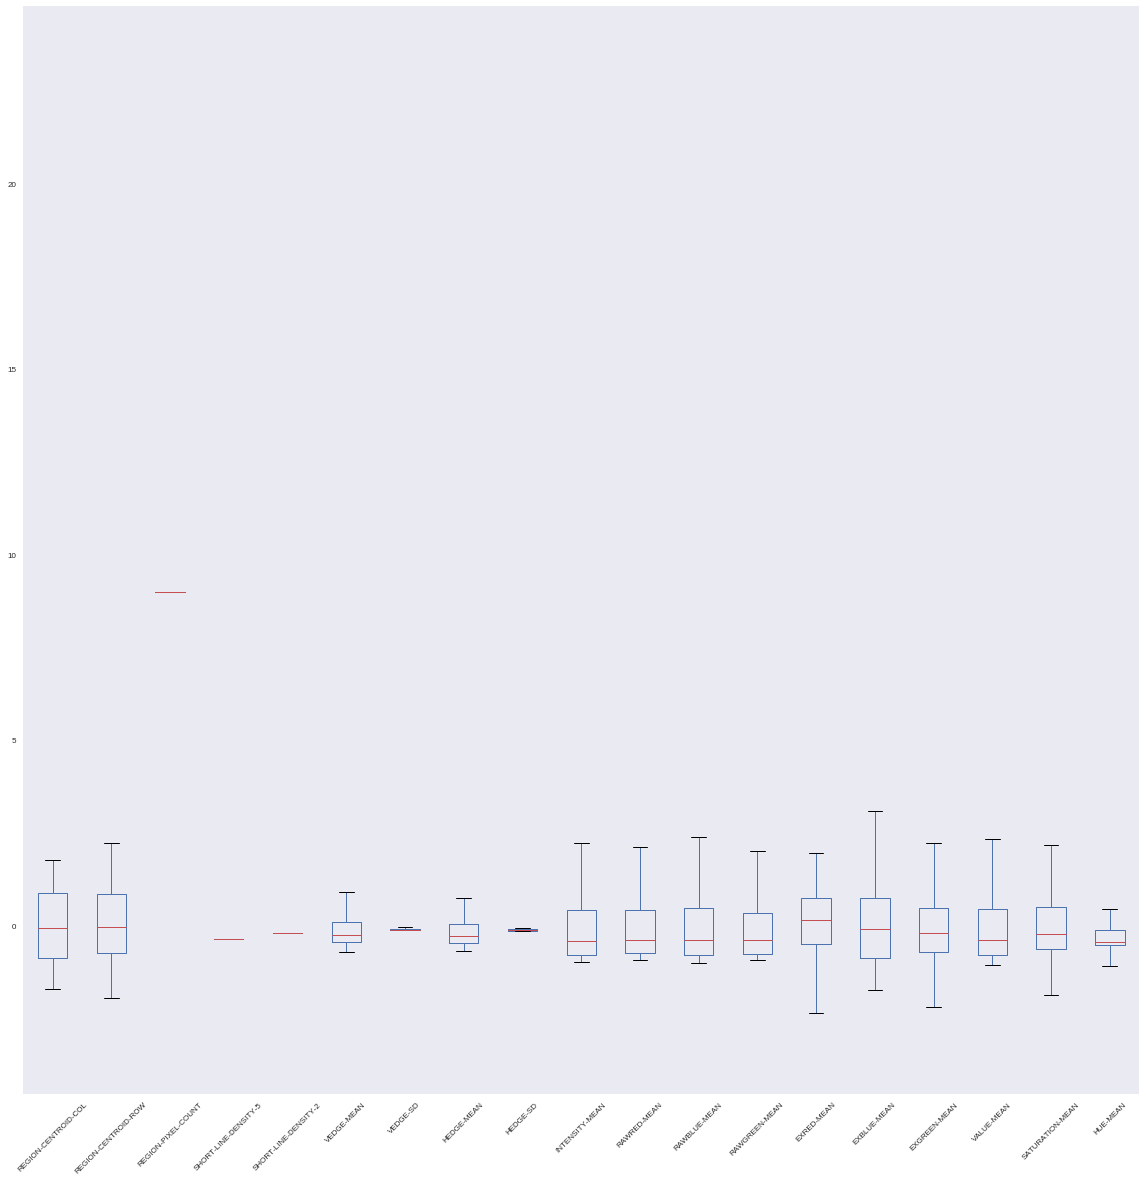

In [182]:
boxplot = total_df_normalized_zscore2.boxplot(grid=False, fontsize=8, rot=45, figsize=(20,20))

**Comment** : After Z Score Normalization we could see that data is not skewed much. So all attribute now have nearly the same range and we can extract patters/insights from the data easily. Moreover, we can see the correlation between the attributes.

## Dimensionality reduction

### 1) Feature Projection Using PCA

Getting PCA Components after Z Score Normalization on the dataset

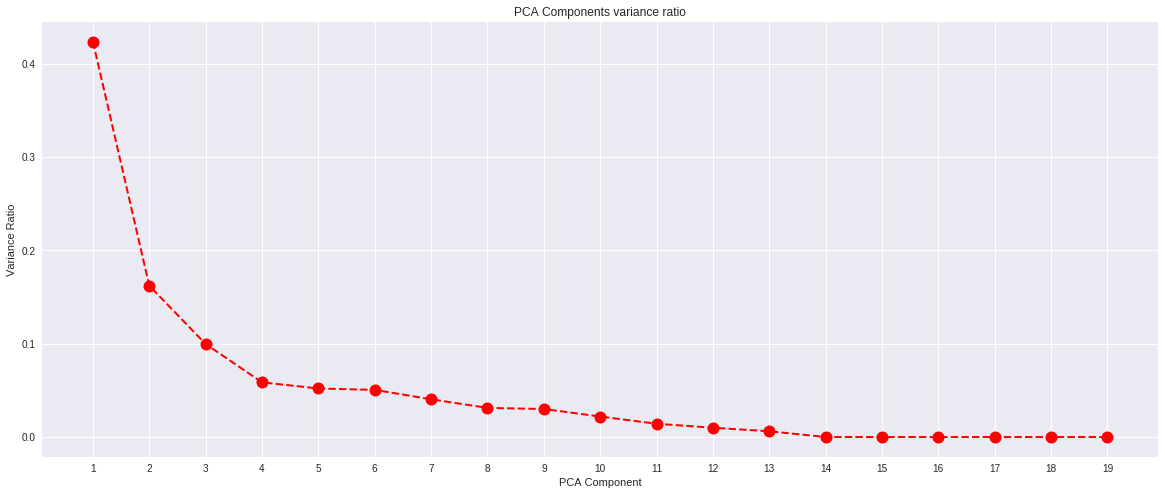

In [183]:
from sklearn.decomposition import PCA
pca = PCA(n_components=19, random_state = 40)
pca.fit(total_df_normalized_zscore2)
plt.figure(figsize=(20,8))
plt.title('PCA Components variance ratio')
plt.xlabel('PCA Component')
plt.ylabel('Variance Ratio')
plt.xticks([i for i in range(1, 20)])
plt.plot([i for i in range(1, 20)], pca.explained_variance_ratio_, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.show()

**Lets explore each the realation between number of PCA components taken and the covered variance ratio by simple plots.**

Total Covered Variance Ration with increasing number of PCA components = 
 [0.42341135 0.58544784 0.68504234 0.74361518 0.79559514 0.84609887
 0.88651302 0.91771445 0.94771247 0.96966275 0.98388365 0.99381892
 0.99998259 1.         1.         1.         1.         1.
 1.        ]


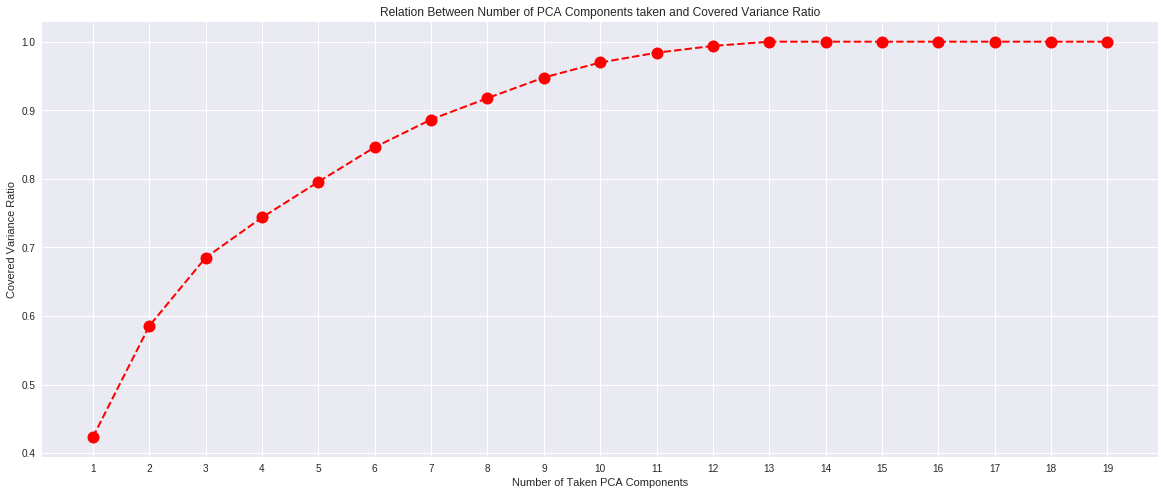

In [184]:
print("Total Covered Variance Ration with increasing number of PCA components = \n {}".format(pca.explained_variance_ratio_.cumsum()))
plt.figure(figsize=(20,8))
plt.title('Relation Between Number of PCA Components taken and Covered Variance Ratio')
plt.xlabel('Number of Taken PCA Components')
plt.ylabel('Covered Variance Ratio')
plt.xticks([i for i in range(1, 20)])
plt.plot([i for i in range(1, 20)], pca.explained_variance_ratio_.cumsum(), color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.show()

**We will reduce the dimensions to 9 features covering 94.77% of total variance.**


In [185]:
pca = PCA(9, random_state = 40)
pca.fit(total_df_normalized_zscore2)
total_df_final = pd.DataFrame(pca.transform(total_df_normalized_zscore2))
print("Dataset after applying PCA Dimensionality Reduction")
display(total_df_final)

Dataset after applying PCA Dimensionality Reduction


,0,1,2,3,4,5,6,7,8
0,-2.341008,-0.568638,-0.650548,-0.477064,-0.054783,-0.136842,0.012842,-0.620450,0.276409
1,-2.397916,-0.598568,-0.432085,-0.911518,0.367182,-0.322516,0.011735,-0.641841,0.313521
2,-2.456240,-0.543694,-0.532037,-0.138027,-0.329315,0.081578,-0.164498,-0.599736,0.271298
3,-2.605458,-0.473095,-0.649493,0.523324,-0.986728,0.381044,-0.184762,-0.539207,0.292317
4,-2.312929,-0.446292,-0.973609,0.452582,-0.968599,0.242354,-0.022998,-0.538380,0.391014
5,-2.492446,-0.517895,-0.825480,0.673388,-1.143871,0.416263,-0.137053,-0.507198,0.357982
6,-0.850164,-0.286840,-1.022699,2.614527,0.284934,-1.136283,0.082629,-0.881976,0.395378
7,-1.329456,-0.017900,-0.791821,0.775720,-1.054178,0.385493,-0.718778,-0.809541,0.777862
8,-1.389388,-0.302241,-0.907463,0.792834,-1.079289,0.389286,-0.604281,-0.824284,0.845216
9,-0.894579,-0.311445,-0.964252,0.106209,-0.404760,0.048909,-0.463270,-0.659446,0.661404


Visualize the correlation matrix of your dataset after applying PCA

,0,1,2,3,4,5,6,7,8
0,1.000000e+00,-9.573551e-17,7.991010e-16,-2.056296e-16,1.062607e-16,1.719290e-16,-7.281850e-17,-5.953364e-16,4.415442e-16
1,-9.573551e-17,1.000000e+00,5.236509e-16,2.506700e-16,-1.589979e-16,2.183594e-16,3.537513e-17,-6.169096e-16,-3.436958e-16
2,7.991010e-16,5.236509e-16,1.000000e+00,1.352916e-16,2.298774e-16,8.935844e-17,-1.414233e-16,1.243056e-17,-3.032894e-16
3,-2.056296e-16,2.506700e-16,1.352916e-16,1.000000e+00,-1.511718e-16,3.416844e-17,-3.829773e-16,1.164106e-16,-1.582278e-16
4,1.062607e-16,-1.589979e-16,2.298774e-16,-1.511718e-16,1.000000e+00,6.947705e-16,-2.911637e-16,-2.805364e-18,7.174255e-17
5,1.719290e-16,2.183594e-16,8.935844e-17,3.416844e-17,6.947705e-16,1.000000e+00,7.249666e-16,-1.874959e-16,-5.230673e-17
6,-7.281850e-17,3.537513e-17,-1.414233e-16,-3.829773e-16,-2.911637e-16,7.249666e-16,1.000000e+00,-1.889111e-17,5.871706e-17
7,-5.953364e-16,-6.169096e-16,1.243056e-17,1.164106e-16,-2.805364e-18,-1.874959e-16,-1.889111e-17,1.000000e+00,4.698216e-16
8,4.415442e-16,-3.436958e-16,-3.032894e-16,-1.582278e-16,7.174255e-17,-5.230673e-17,5.871706e-17,4.698216e-16,1.000000e+00


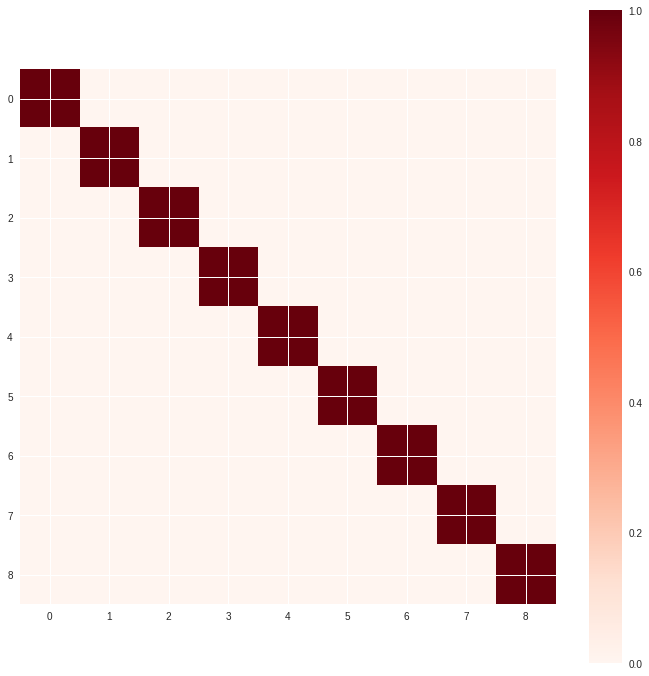

In [186]:
display(total_df_final.corr())
visualize_coeff_matrix(total_df_final.corr())

**Conclusion: ** From the previous heatmap we can see that all attributes are not correlated. And we actually expect that as PCA gives the resulting vectors (each being a linear combination of the variables and containing n observations) are an **uncorrelated orthogonal basis set.** 

### Making PCA from scratch

In [0]:
def eign_values (matrix) :
  [ values , vectors ] = np.linalg.eig(matrix) 
  return { "values" : values , "vectors" : vectors } 

In [188]:
eign = eign_values(total_df_normalized_zscore2.cov())
display(eign["values"])

array([7.62470498e+00, 2.91791997e+00, 1.79347755e+00, 1.05476759e+00,
       9.36044614e-01, 9.09460719e-01, 7.27769748e-01, 5.61868991e-01,
       5.40198242e-01, 3.95276235e-01, 2.56087079e-01, 1.10994011e-01,
       1.78912307e-01, 3.13545971e-04, 1.42478751e-15, 1.93937067e-15,
       2.70301019e-15, 2.40876854e-15, 0.00000000e+00])

In [0]:
def choose_dim_red (eign_values , threshold = 0.8) :
  sum_up = np.sum(eign_values)
  current = 0 
  taken = 0
  for i in range (0, len(eign_values)) :
      current += eign_values[i] 
      taken += 1
      if(current / sum_up >= threshold):
        return taken
  return len(eign_values)   

In [190]:
print('reduced number of attributes = {}'.format(choose_dim_red(eign["values"])))

reduced number of attributes = 6


In [0]:
def reduce_pca (reduced_dim , eign_vectors , X) :
  eign_vectors = eign_vectors[:,0:reduced_dim]
  X = np.dot(X,eign_vectors)
  return X

In [192]:
reduced_dim = choose_dim_red(eign["values"])
reduced_x = reduce_pca(reduced_dim , eign["vectors"] , X) 
print("reduced X is of size : {}".format(np.shape(reduced_x)))
display(pd.DataFrame(reduced_x))

reduced X is of size : (2310, 6)


,0,1,2,3,4,5
0,7.817499,1.702180,65.171597,88.931843,-110.929376,14.780890
1,8.180783,1.197225,75.245088,121.055043,-142.329012,28.461007
2,12.308359,2.600203,65.759848,64.709922,-91.159465,0.202632
3,14.852381,3.451594,55.254924,16.721722,-45.870168,-22.132145
4,7.193049,2.910645,45.655406,21.137942,-44.842143,-14.383170
5,13.080671,3.216212,48.883556,4.946844,-33.265350,-25.878483
6,-35.068104,2.074546,31.271599,12.706425,-27.771358,-9.133130
7,-17.381743,5.013035,46.537802,3.520356,-26.428200,-21.884053
8,-16.902236,2.029885,44.462663,1.259293,-25.147532,-23.483860
9,-30.942051,0.922854,53.143023,51.357088,-70.520690,1.614825


### 2) Feature Selection

Choose the best **K=9** features

In [193]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=9)
selector.fit(total_df_normalized_zscore2, Y)
total_df_reduced1 = pd.DataFrame(selector.transform(total_df_normalized_zscore2))
print("Dataset after applying feature selection with the best 9 features")
display(total_df_reduced1)

Dataset after applying feature selection with the best 9 features


,0,1,2,3,4,5,6,7,8
0,0.027539,-0.808696,-0.727621,-0.839220,-0.841382,-0.866965,0.071789,-0.870602,0.156038
1,0.166738,-0.796081,-0.699073,-0.836667,-0.832214,-0.923748,0.033306,-0.855067,0.283547
2,0.271138,-0.810636,-0.721277,-0.849433,-0.841382,-0.923748,0.091031,-0.875781,0.256926
3,0.236338,-0.817429,-0.714933,-0.867306,-0.847494,-1.003245,0.100651,-0.870602,0.400405
4,-0.216061,-0.812577,-0.737137,-0.839220,-0.844438,-0.844252,0.081410,-0.868013,0.121116
5,0.079739,-0.825192,-0.740309,-0.862199,-0.853607,-0.923748,0.119893,-0.886138,0.244069
6,-0.981659,-0.446749,-0.378706,-0.420492,-0.538826,-0.191244,-0.659387,-0.448554,-0.168482
7,-0.233461,-0.501090,-0.397737,-0.522621,-0.569387,-0.554657,-0.409248,-0.552124,0.011522
8,-0.268261,-0.507882,-0.394565,-0.530281,-0.584668,-0.566014,-0.486214,-0.559892,0.039329
9,-0.390060,-0.412787,-0.331126,-0.400066,-0.502153,-0.253706,-0.649766,-0.427840,-0.126668


Visualize the reduced dataset of 9 features using boxplots

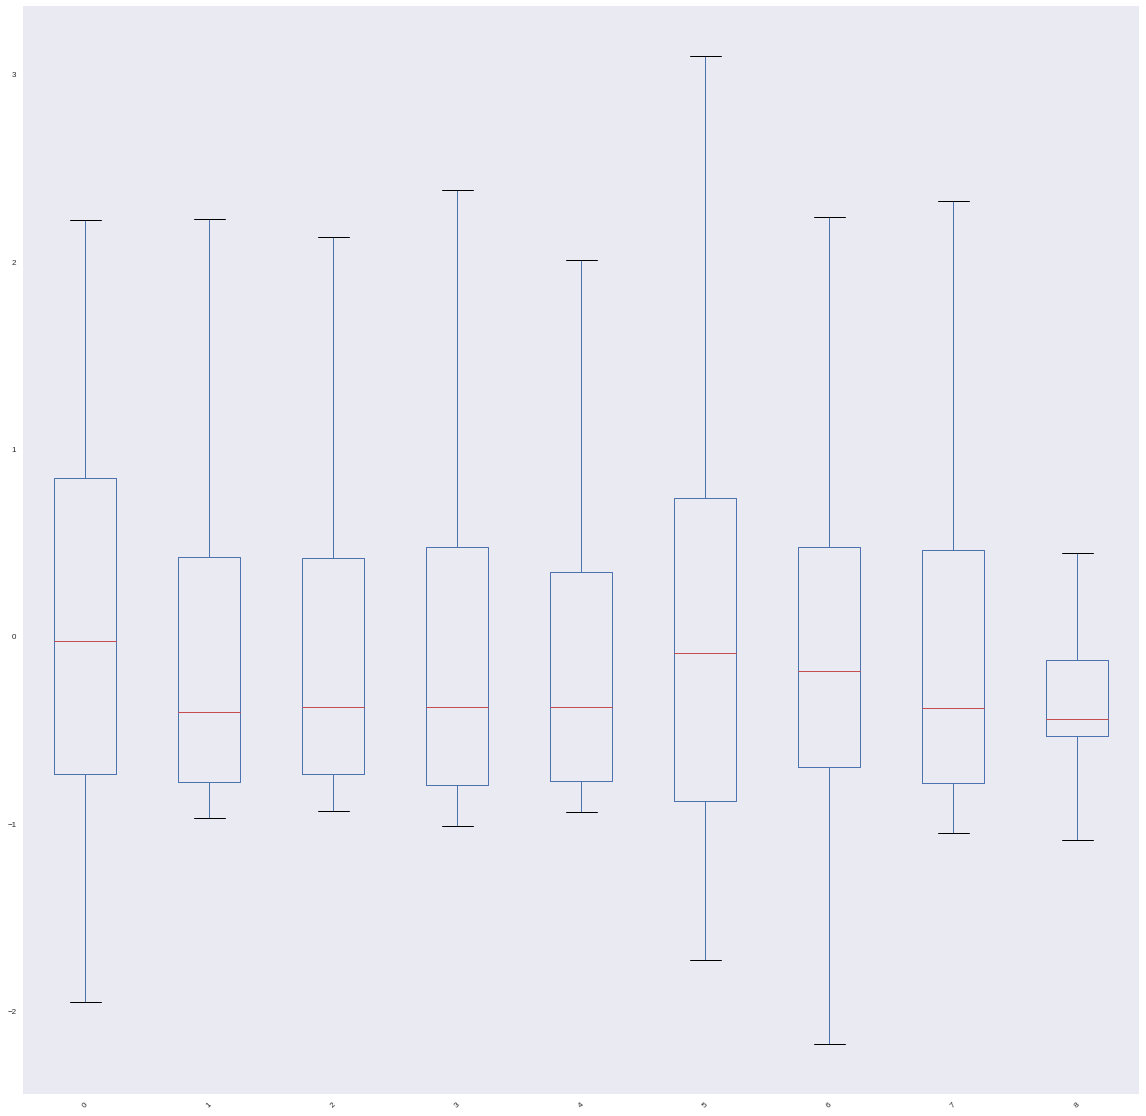

In [194]:
total_df_reduced1.boxplot(grid=False, fontsize=8, rot=45, figsize=(20,20))

Visualize the correlation matrix between  the 9 features

,0,1,2,3,4,5,6,7,8
0,1.000000,-0.465240,-0.468009,-0.481521,-0.437971,-0.490219,0.476421,-0.458388,0.592930
1,-0.465240,1.000000,0.998112,0.995809,0.995842,0.792257,-0.509756,0.997385,-0.329845
2,-0.468009,0.998112,1.000000,0.990813,0.994056,0.769970,-0.507899,0.992062,-0.328574
3,-0.481521,0.995809,0.990813,1.000000,0.984659,0.844741,-0.573816,0.998644,-0.384925
4,-0.437971,0.995842,0.994056,0.984659,1.000000,0.742197,-0.429265,0.990042,-0.261516
5,-0.490219,0.792257,0.769970,0.844741,0.742197,1.000000,-0.845512,0.826474,-0.638034
6,0.476421,-0.509756,-0.507899,-0.573816,-0.429265,-0.845512,1.000000,-0.538610,0.800497
7,-0.458388,0.997385,0.992062,0.998644,0.990042,0.826474,-0.538610,1.000000,-0.341337
8,0.592930,-0.329845,-0.328574,-0.384925,-0.261516,-0.638034,0.800497,-0.341337,1.000000


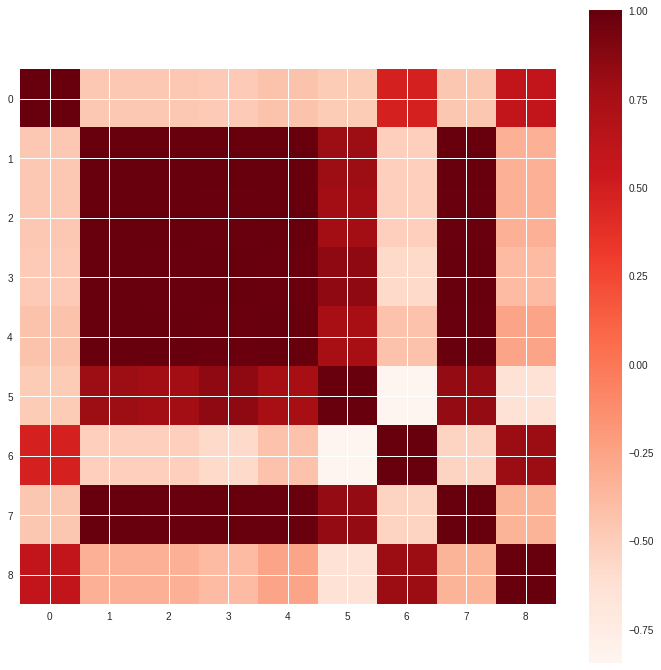

In [195]:
display(total_df_reduced1.corr())
visualize_coeff_matrix(total_df_reduced1.corr())

Choose the best **K=6** features

In [196]:
selector = SelectKBest(k=6)
selector.fit(total_df_normalized_zscore2, Y)
total_df_reduced2 = pd.DataFrame(selector.transform(total_df_normalized_zscore2))
print("Dataset after applying feature selection with the best 9 features")
display(total_df_reduced2)

Dataset after applying feature selection with the best 9 features


,0,1,2,3,4,5
0,-0.808696,-0.727621,-0.839220,-0.841382,-0.870602,0.156038
1,-0.796081,-0.699073,-0.836667,-0.832214,-0.855067,0.283547
2,-0.810636,-0.721277,-0.849433,-0.841382,-0.875781,0.256926
3,-0.817429,-0.714933,-0.867306,-0.847494,-0.870602,0.400405
4,-0.812577,-0.737137,-0.839220,-0.844438,-0.868013,0.121116
5,-0.825192,-0.740309,-0.862199,-0.853607,-0.886138,0.244069
6,-0.446749,-0.378706,-0.420492,-0.538826,-0.448554,-0.168482
7,-0.501090,-0.397737,-0.522621,-0.569387,-0.552124,0.011522
8,-0.507882,-0.394565,-0.530281,-0.584668,-0.559892,0.039329
9,-0.412787,-0.331126,-0.400066,-0.502153,-0.427840,-0.126668


Visualize the reduced dataset of 6 features using boxplots

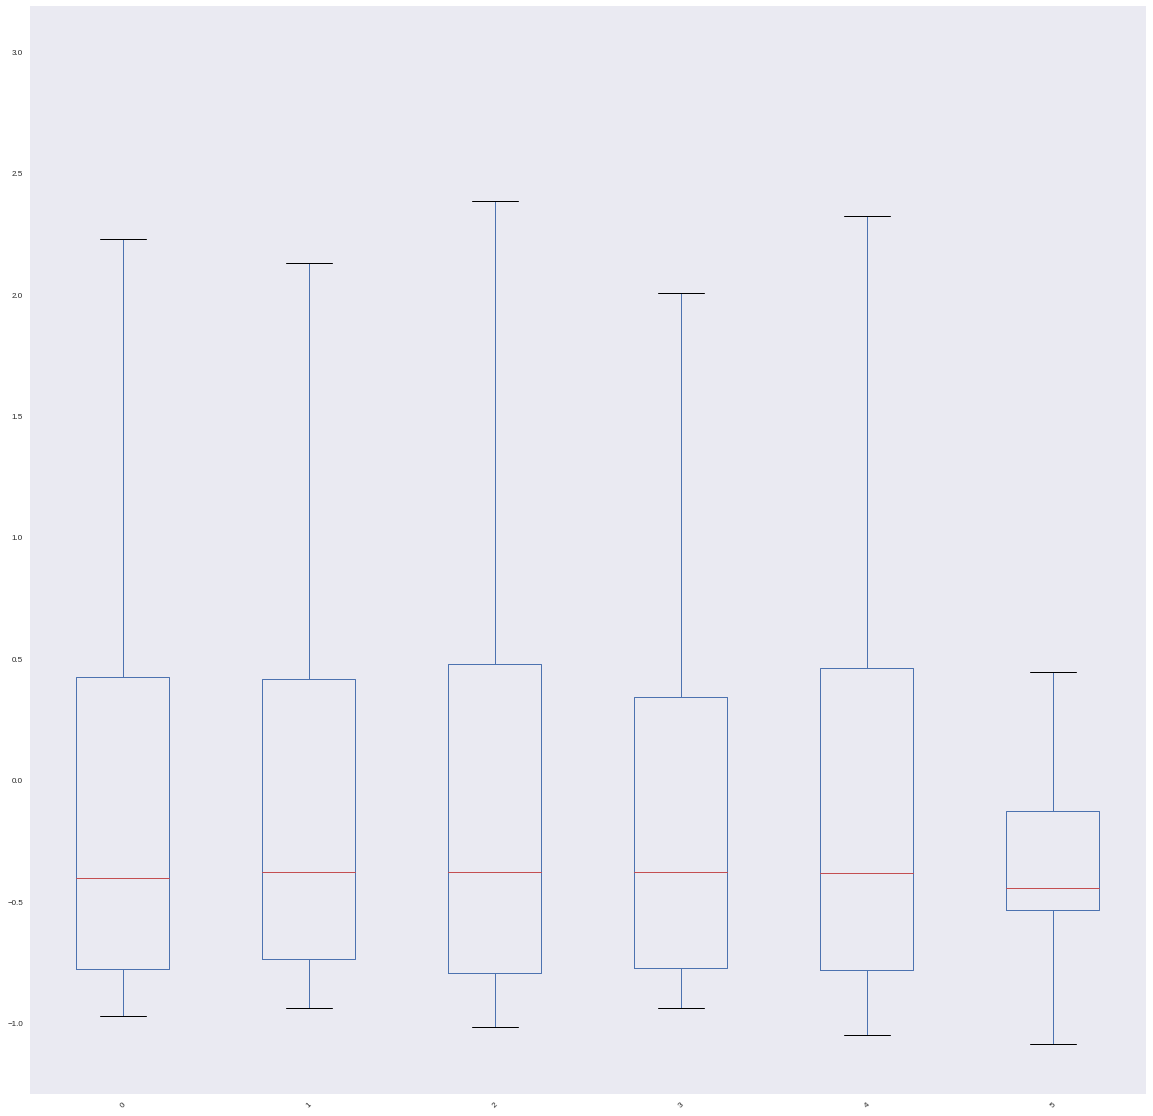

In [197]:
total_df_reduced2.boxplot(grid=False, fontsize=8, rot=45, figsize=(20,20))

Visualize the correlation matrix between the 6 features

,0,1,2,3,4,5
0,1.000000,0.998112,0.995809,0.995842,0.997385,-0.329845
1,0.998112,1.000000,0.990813,0.994056,0.992062,-0.328574
2,0.995809,0.990813,1.000000,0.984659,0.998644,-0.384925
3,0.995842,0.994056,0.984659,1.000000,0.990042,-0.261516
4,0.997385,0.992062,0.998644,0.990042,1.000000,-0.341337
5,-0.329845,-0.328574,-0.384925,-0.261516,-0.341337,1.000000


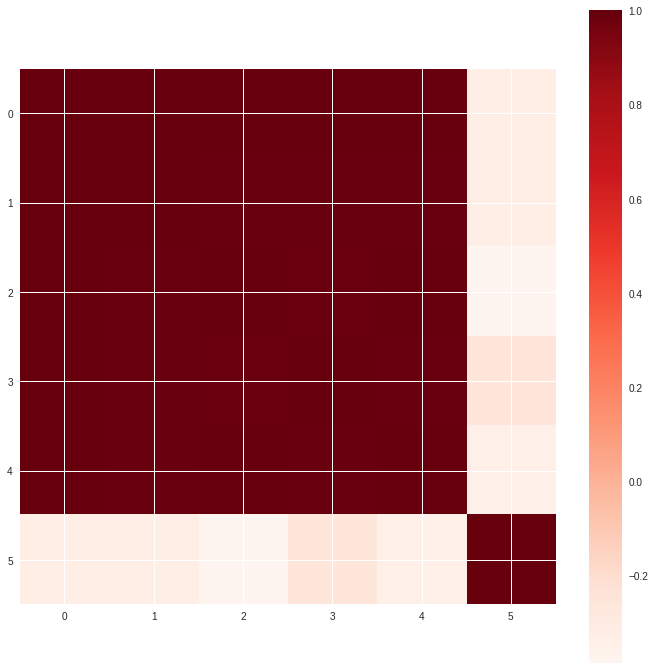

In [198]:
display(total_df_reduced2.corr())
visualize_coeff_matrix(total_df_reduced2.corr())

**Conclusion: ** Feature Selection on the other hand of PCA gives us features which are highly correlated with each other. So they are not the optimal dimensionality reduction as we can reduce the correlated attributes further more and get small number of features which is better for the running time.